## Introduction (aperçu des données)

Nous commençons par importer les librairies utiles et nos données

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Remplacer le commentaire pour avoir le bon chemin pour le fichier csv 8
#data = pd.read_csv("/Users/pierrelucien/Downloads/8 predict_students_dropout_and_academic_success.csv", header=0, sep=";")
data = pd.read_csv('data.csv',header=0, sep=";") #forme générale si les données sont dans le bon répertoire
#Aperçu des données
#On convertie la donnée target en 0 ou 1 selon si l'on a réussi l'année ou pas 
data['Class'] = data['Class'].map({'Dropout': 0, 'Graduate': 1})
print("Aperçu des données :")
print(data.head(), "\n")

Aperçu des données :
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                

In [22]:
# Noms des colonnes et dimension
print("📏 Dimensions :", data.shape)
print("🏷️ Noms des colonnes :", data.columns.tolist(), "\n")

📏 Dimensions : (3630, 37)
🏷️ Noms des colonnes : ['Marital Status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',

Analyse de chaques variables pour identifier si elles sont bien numériques

In [26]:
# Typologie des variables
print("Types de variables :")
print(data.dtypes, "\n")

Types de variables :
Marital Status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                            

In [25]:
# Détection des valeurs manquantes
print("Valeurs manquantes par variable :")
print(data.isnull().sum(), "\n")

Valeurs manquantes par variable :
Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder            

## --> Aucune variable Null 

In [27]:
# Statistiques descriptives (pour les variables numériques)
print("Statistiques descriptives :")
print(data.describe().T, "\n")

Statistiques descriptives :
                                                 count         mean  \
Marital Status                                  3630.0     1.184298   
Application mode                                3630.0    18.421763   
Application order                               3630.0     1.750138   
Course                                          3630.0  8853.980992   
Daytime/evening attendance                      3630.0     0.887603   
Previous qualification                          3630.0     4.532231   
Previous qualification (grade)                  3630.0   132.920606   
Nacionality                                     3630.0     1.828099   
Mother's qualification                          3630.0    19.986226   
Father's qualification                          3630.0    22.571625   
Mother's occupation                             3630.0    10.138567   
Father's occupation                             3630.0    10.282920   
Admission grade                                 3

On va tracer chaques graphiques pour chaque variables afin de voir comment elles sont réparties. On trace de même les boxplots pour regarder les valeurs anormales.

In [28]:
num_cols = data.select_dtypes(include=[np.number]).columns

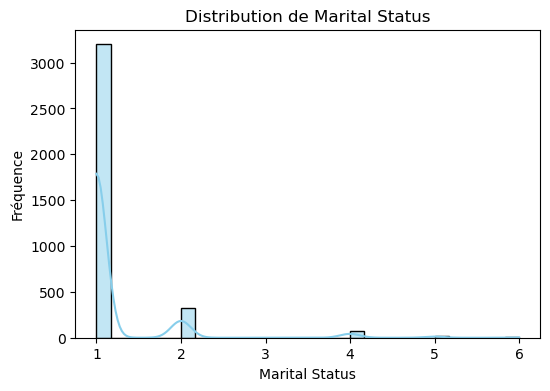

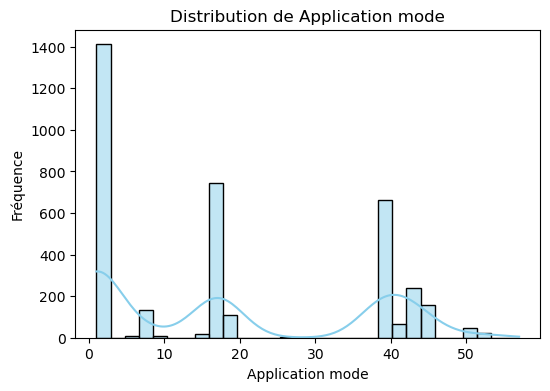

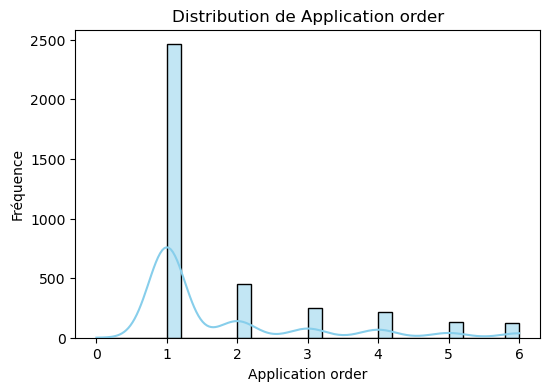

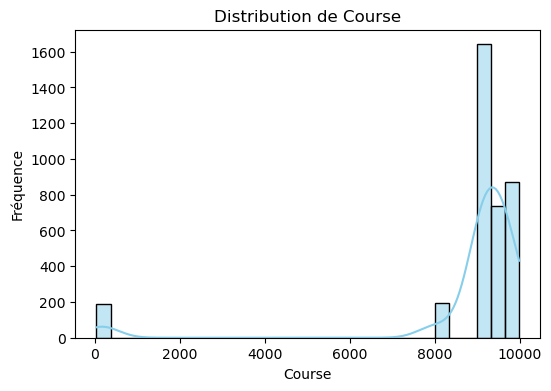

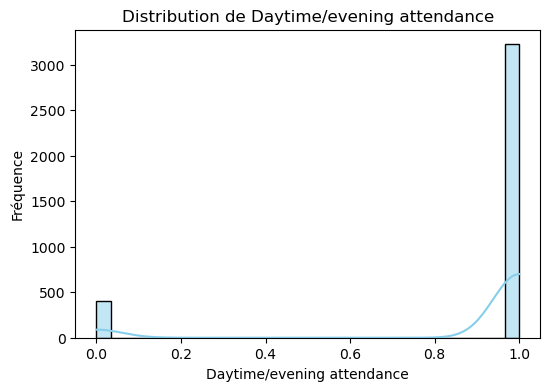

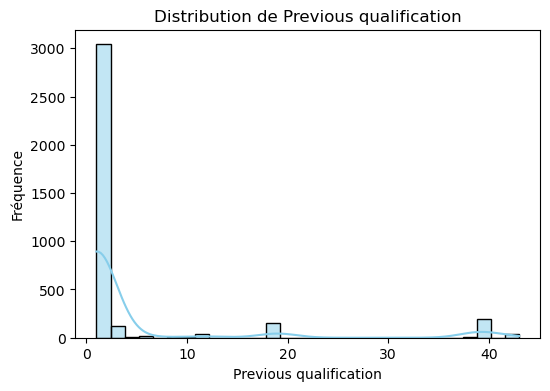

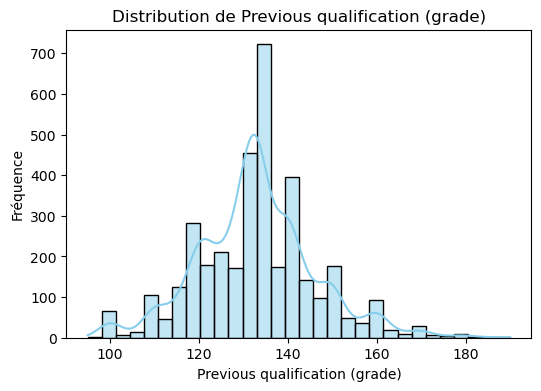

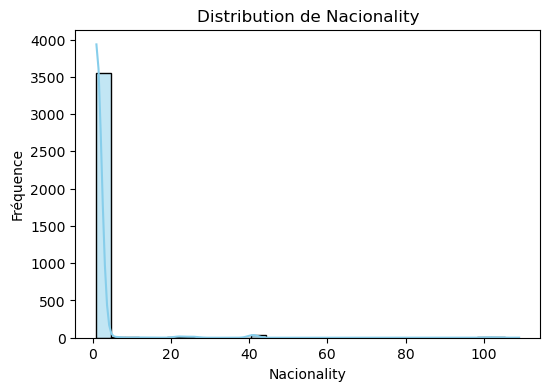

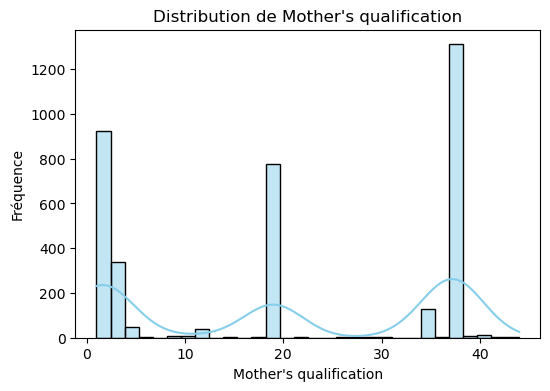

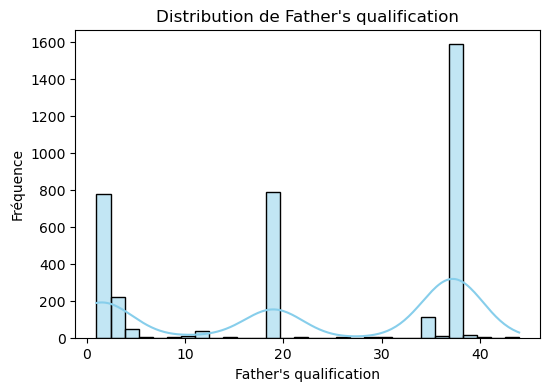

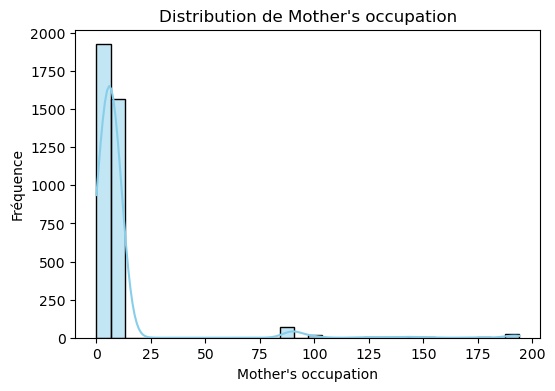

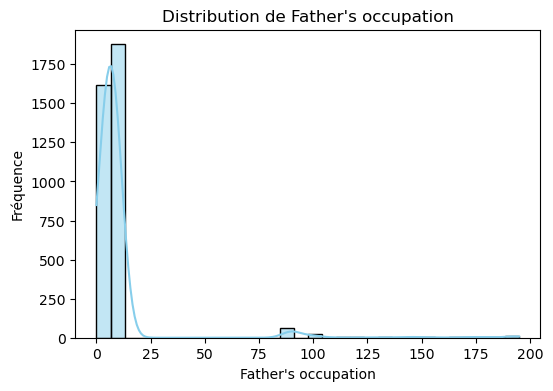

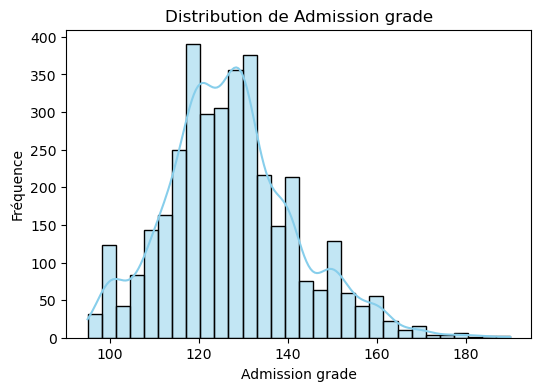

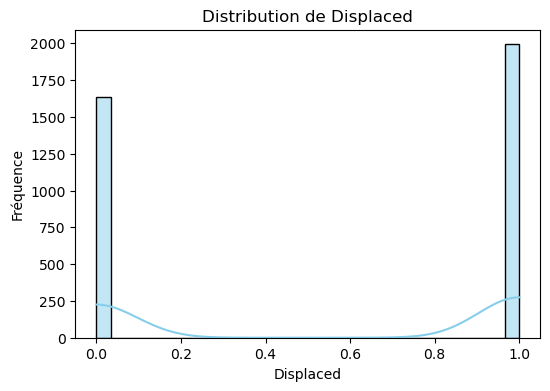

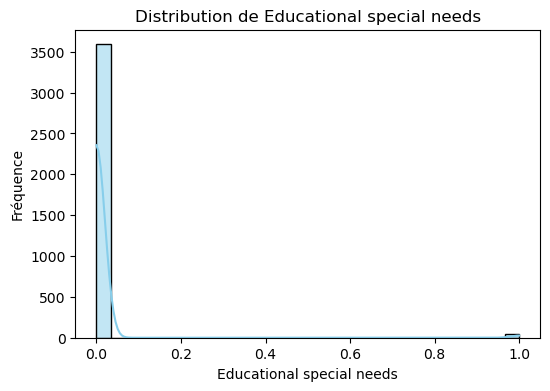

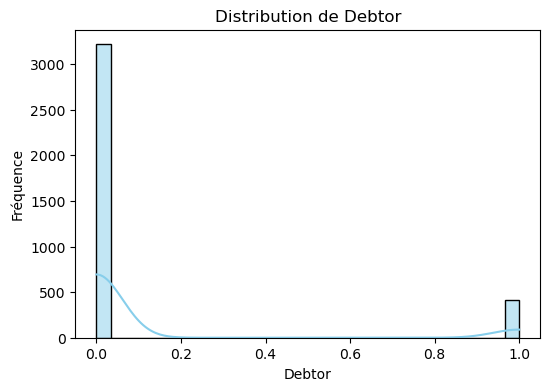

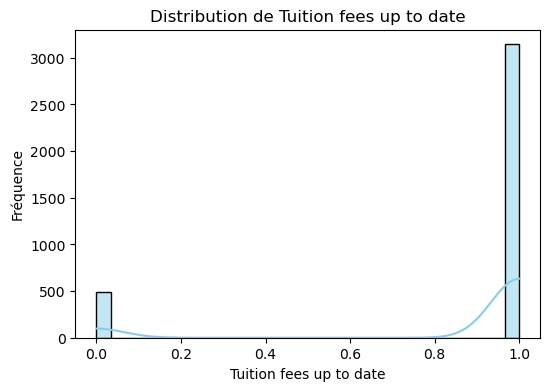

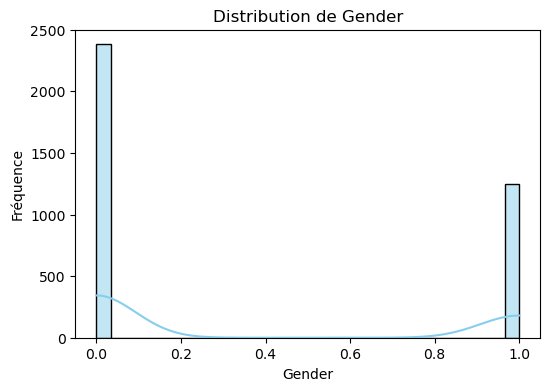

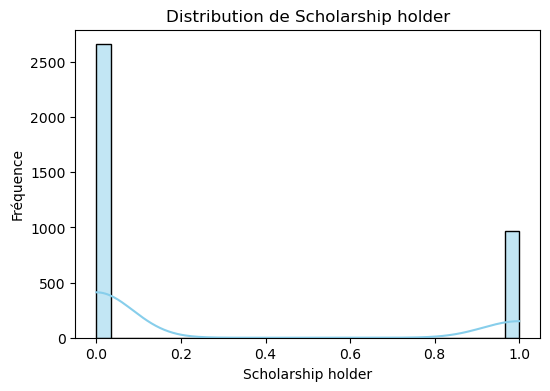

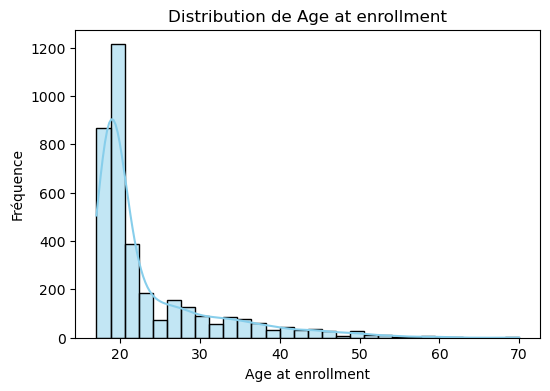

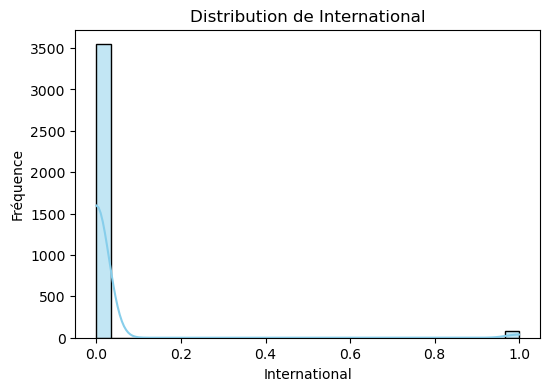

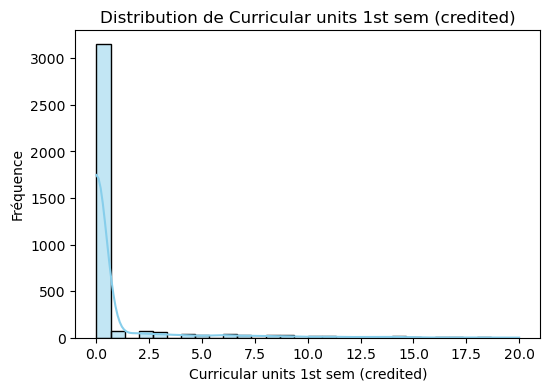

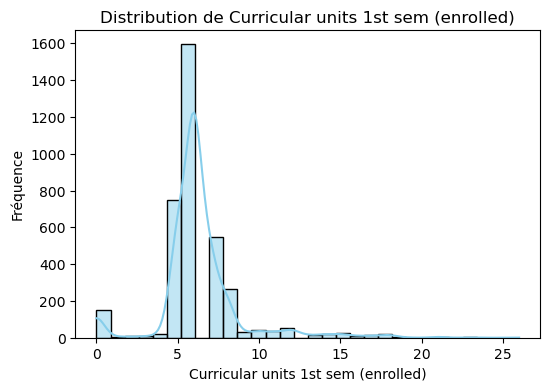

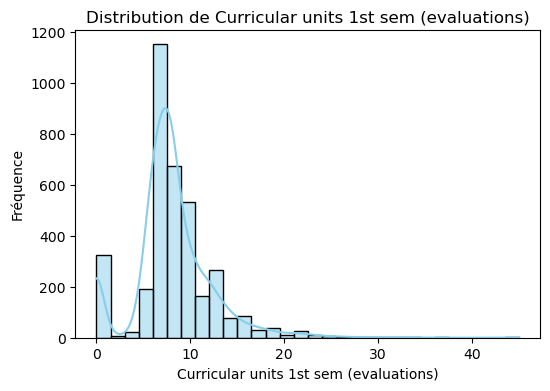

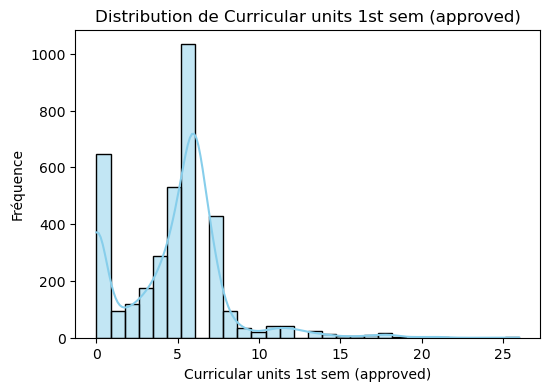

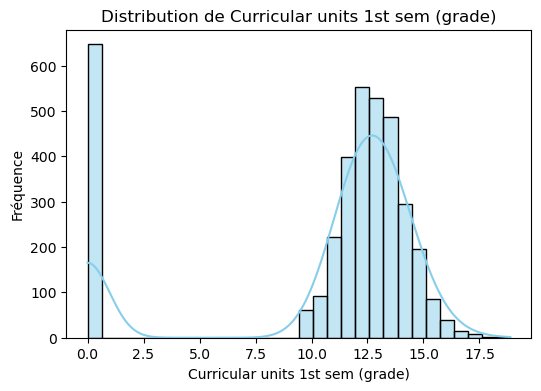

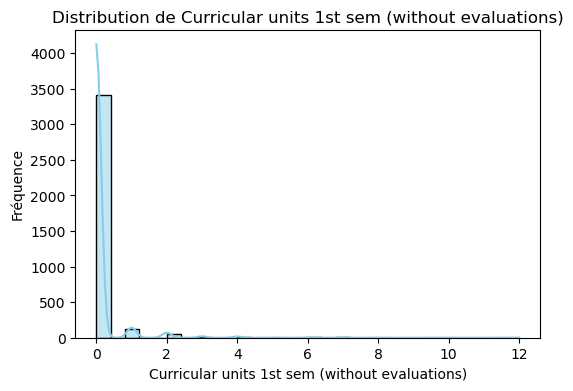

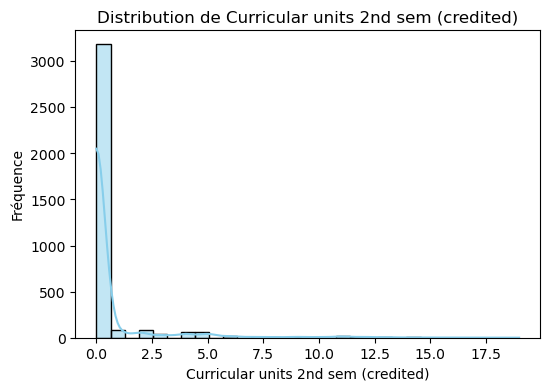

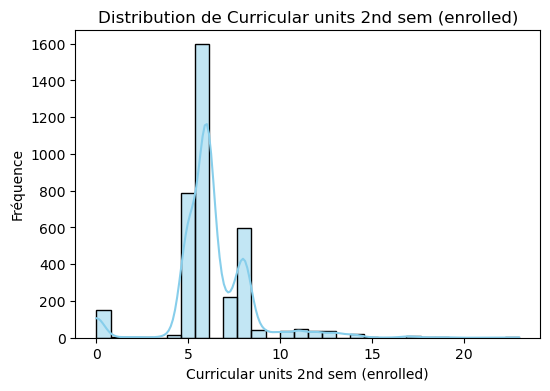

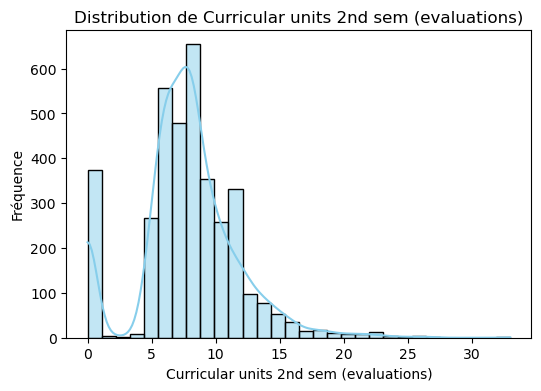

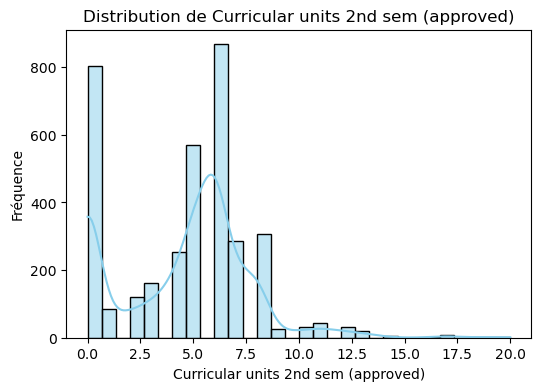

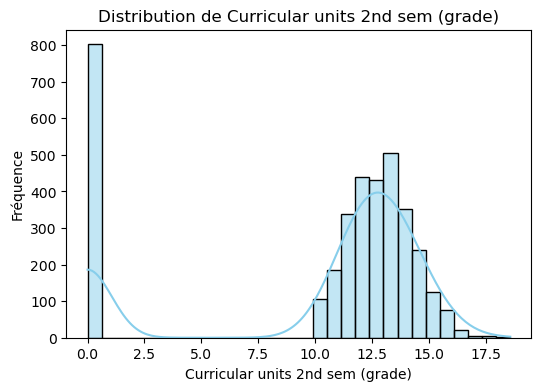

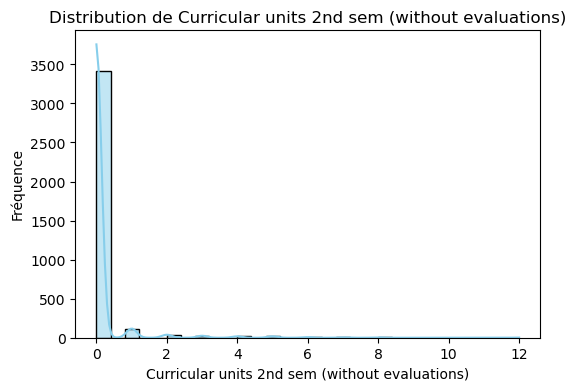

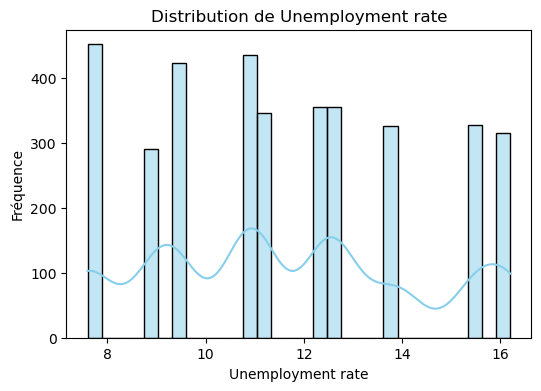

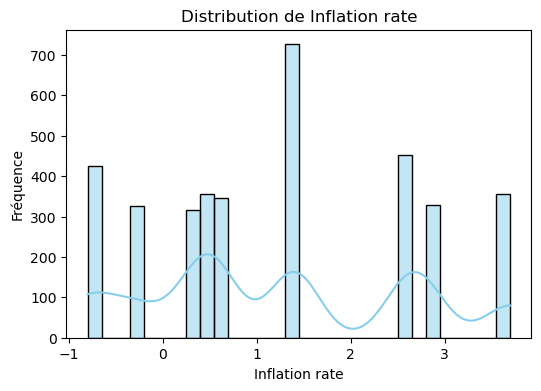

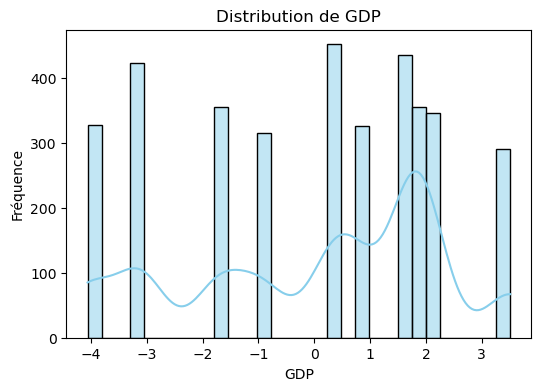

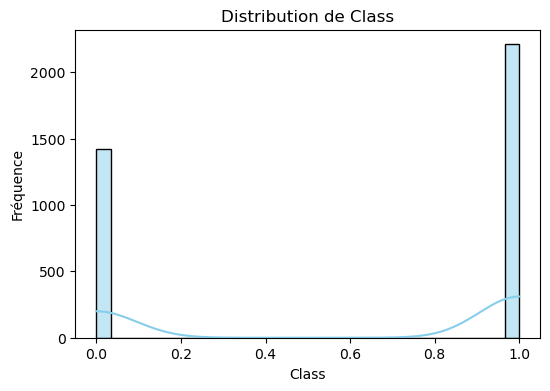

In [29]:
# Distribution des variables numériques
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

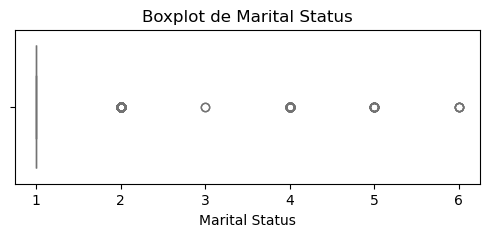

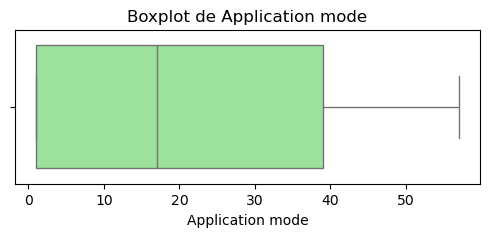

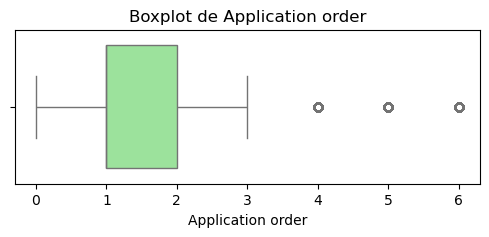

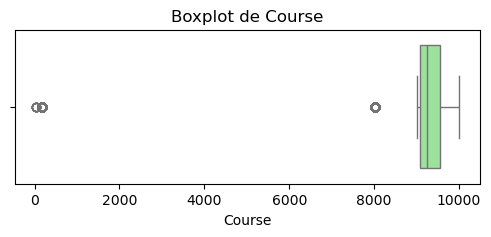

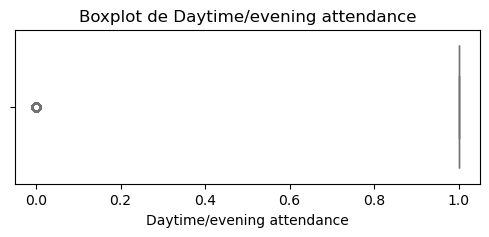

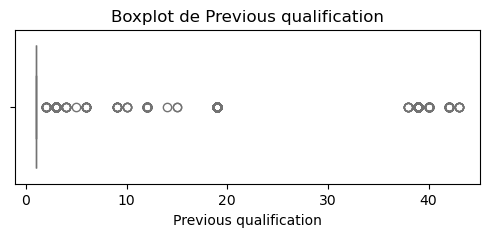

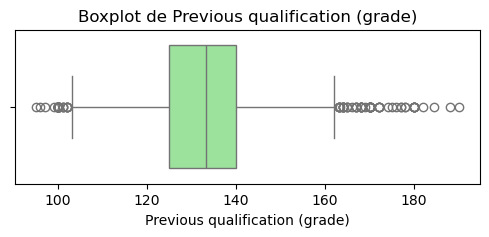

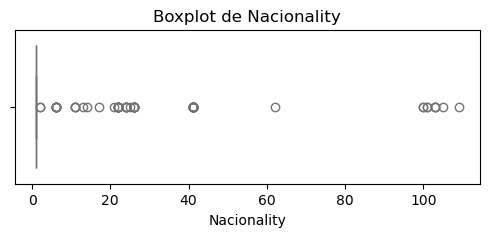

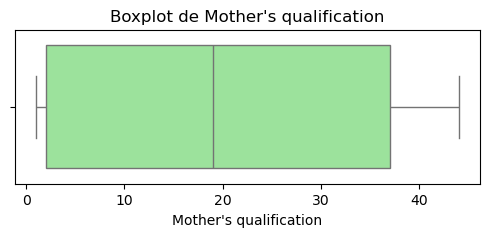

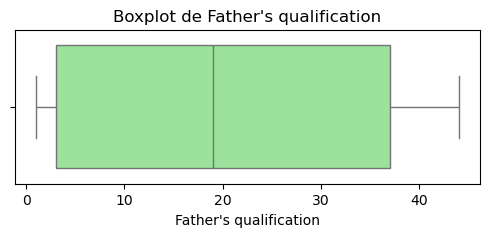

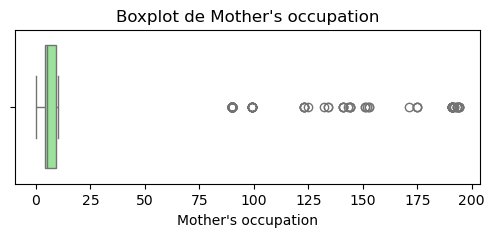

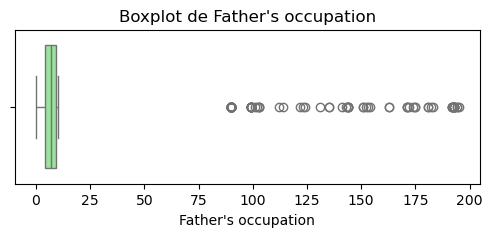

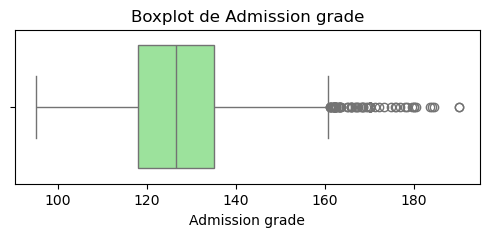

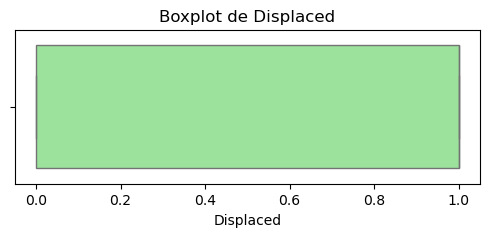

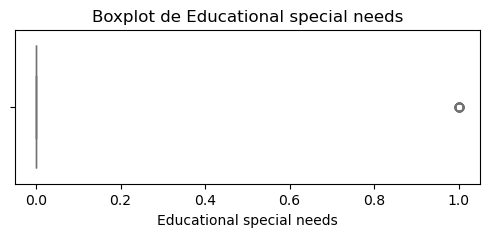

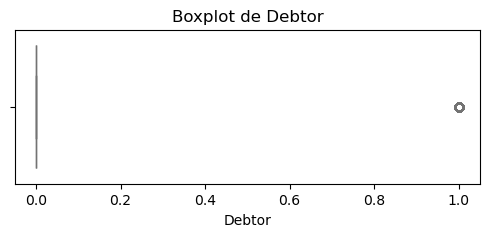

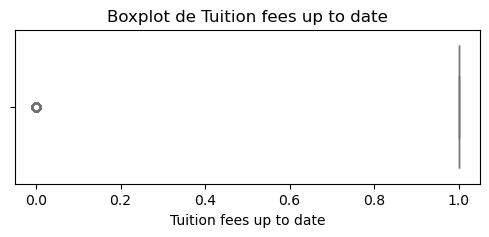

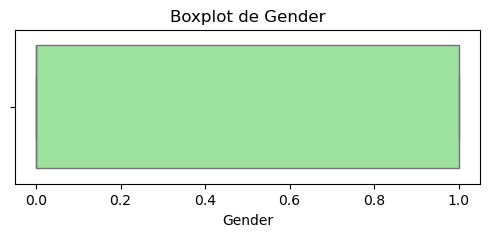

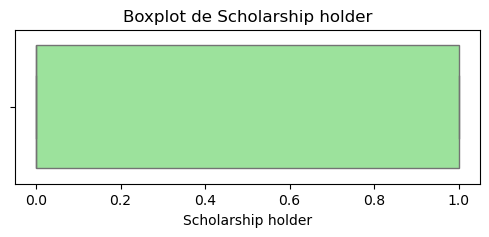

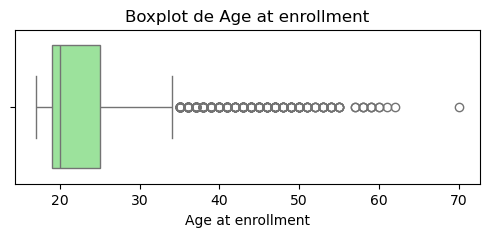

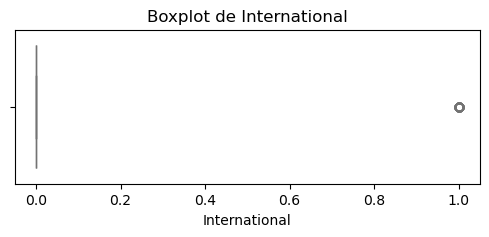

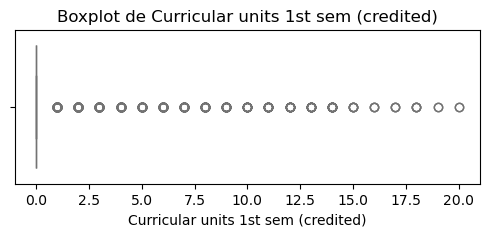

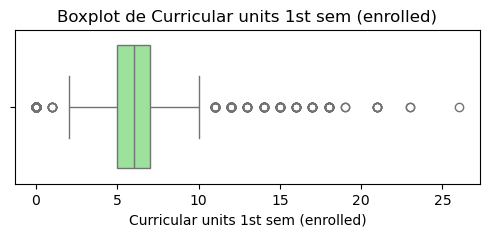

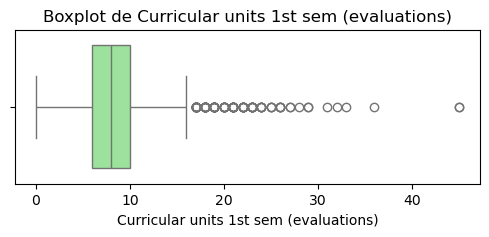

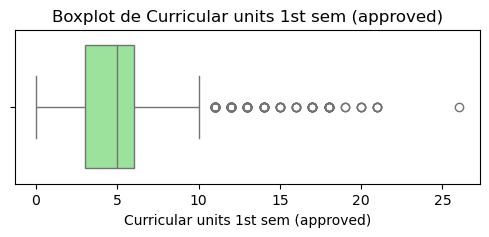

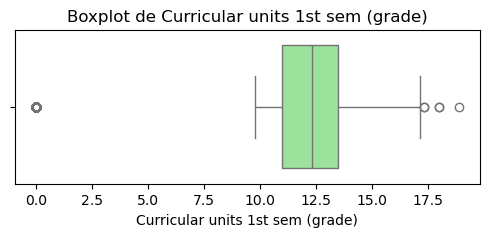

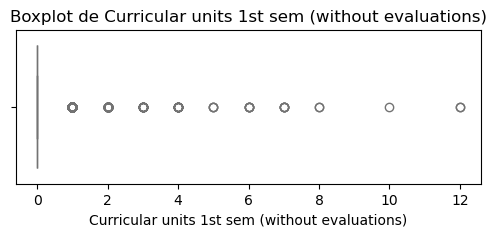

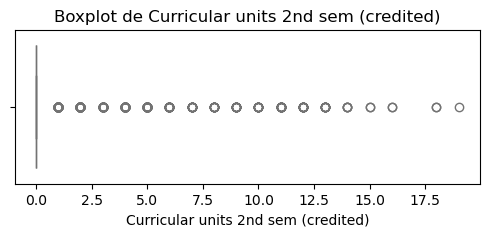

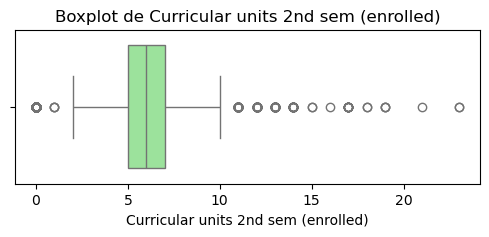

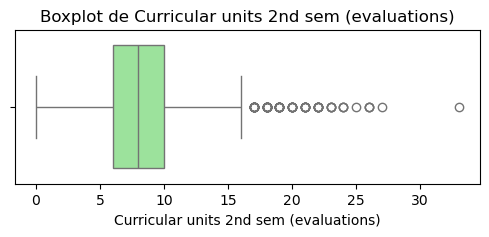

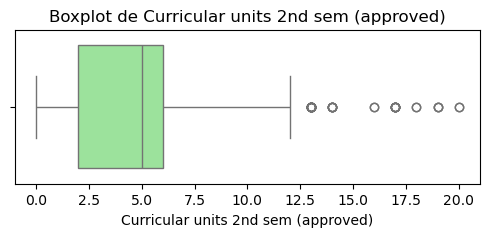

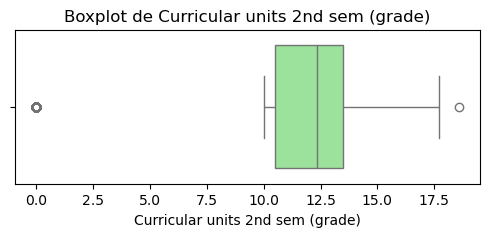

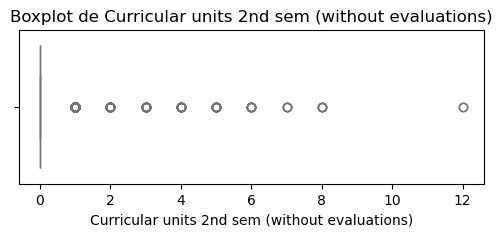

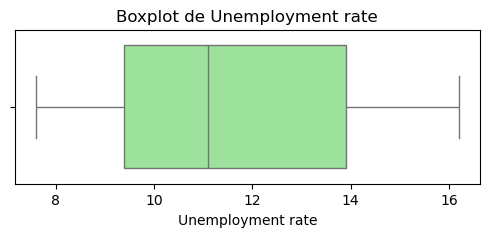

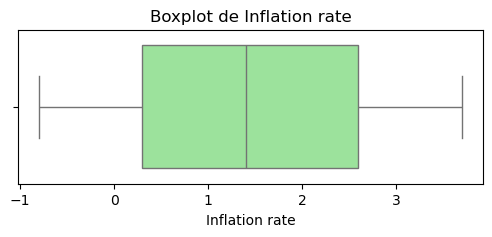

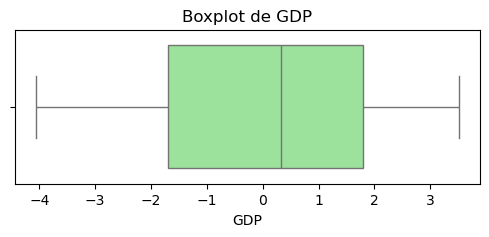

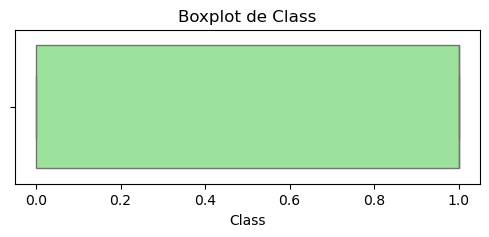

In [30]:
# Boxplots pour détecter les valeurs extrêmes
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.show()

C:\Users\victo\AppData\Local\Temp\ipykernel_46596\3756333468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Class'], palette='coolwarm')


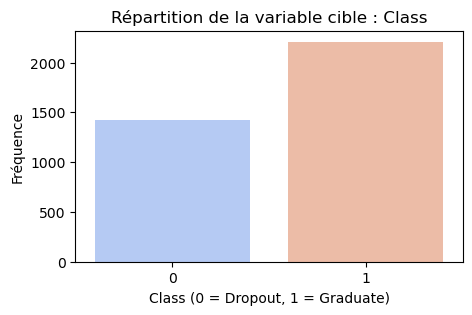

In [31]:
# Distribution de la variable cible (même si elle est numérique maintenant)
plt.figure(figsize=(5, 3))
sns.countplot(x=data['Class'], palette='coolwarm')
plt.title("Répartition de la variable cible : Class")
plt.xlabel("Class (0 = Dropout, 1 = Graduate)")
plt.ylabel("Fréquence")
plt.show()

## Nettoyage 1 : on sélectionne Class comme la variable à prédire et on va chercher à supprimer les colonnes inutiles

In [32]:
# Choix de la variable cible 
target_col = 'Class' if 'Class' in data.columns else data.columns[-1]
print("Cible utilisée :", target_col)

Cible utilisée : Class


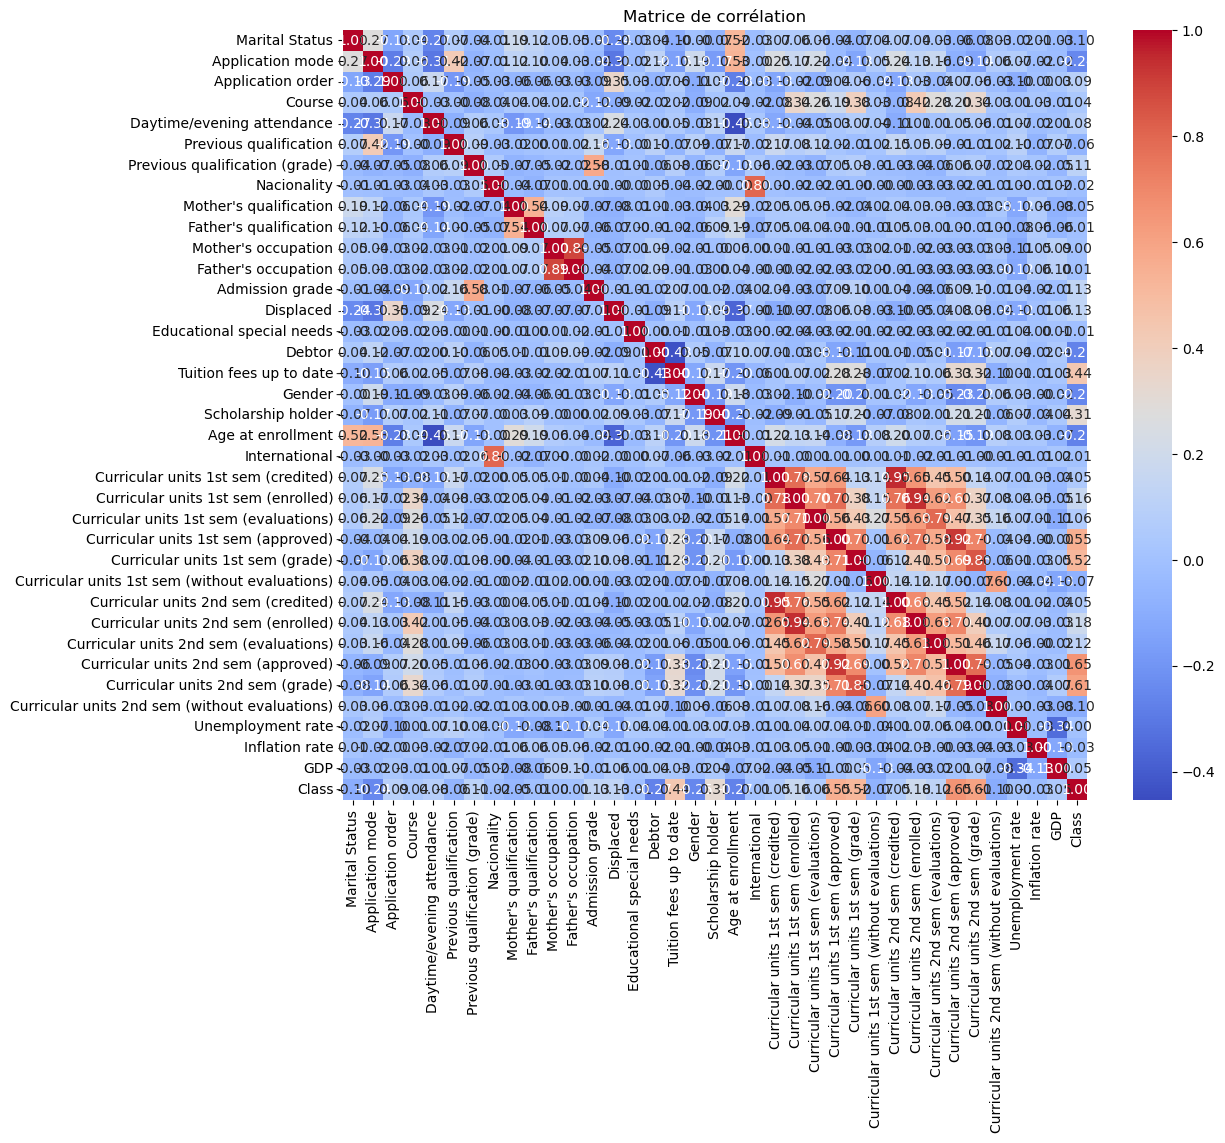

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = data.corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

## On va supprimer les variables prédictives qui sont corrélées à d'autres variables prédictives sauf si elles aident à la prédiction de Y, dans ce cas on les garde. On supprime les variables corrélées à d'autres à plus de 50% sauf si elles prédisent la variable Y à plus de 30%

In [34]:
import pandas as pd
import numpy as np

def remove_correlated(df, target, seuil_corr=0.5, seuil_importance=0.3):
    data = df.copy()

    # Matrice de corrélation absolue
    corr = data.corr().abs()
    corr_target = corr[target].drop(target)
    corr = corr.drop(columns=[target], index=[target])

    to_remove = set()

    # Parcours simple des paires
    for i in corr.columns:
        for j in corr.columns:
            if i >= j:  # éviter doublons et diag
                continue
            if corr.loc[i, j] > seuil_corr:
                # Si les deux sont faibles, supprimer la moins corrélée à y
                if corr_target[i] < seuil_importance and corr_target[j] < seuil_importance:
                    to_remove.add(i if corr_target[i] < corr_target[j] else j)
                # Si une seule est faible, supprimer celle faible
                elif corr_target[i] < seuil_importance:
                    to_remove.add(i)
                elif corr_target[j] < seuil_importance:
                    to_remove.add(j)
                # Sinon (les deux fortes), ne rien supprimer
                else:
                    continue

    print(f"🧹 {len(to_remove)} variables supprimées : {sorted(to_remove)}")
    return df.drop(columns=list(to_remove))

In [35]:
df_clean = remove_correlated(data, target='Class', seuil_corr=0.5, seuil_importance=0.3)

🧹 13 variables supprimées : ['Application mode', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', "Father's qualification", 'International', 'Marital Status', "Mother's occupation", 'Previous qualification (grade)']


## On supprime 13 variables en tout

## Matrice de corrélation sans données corrélées

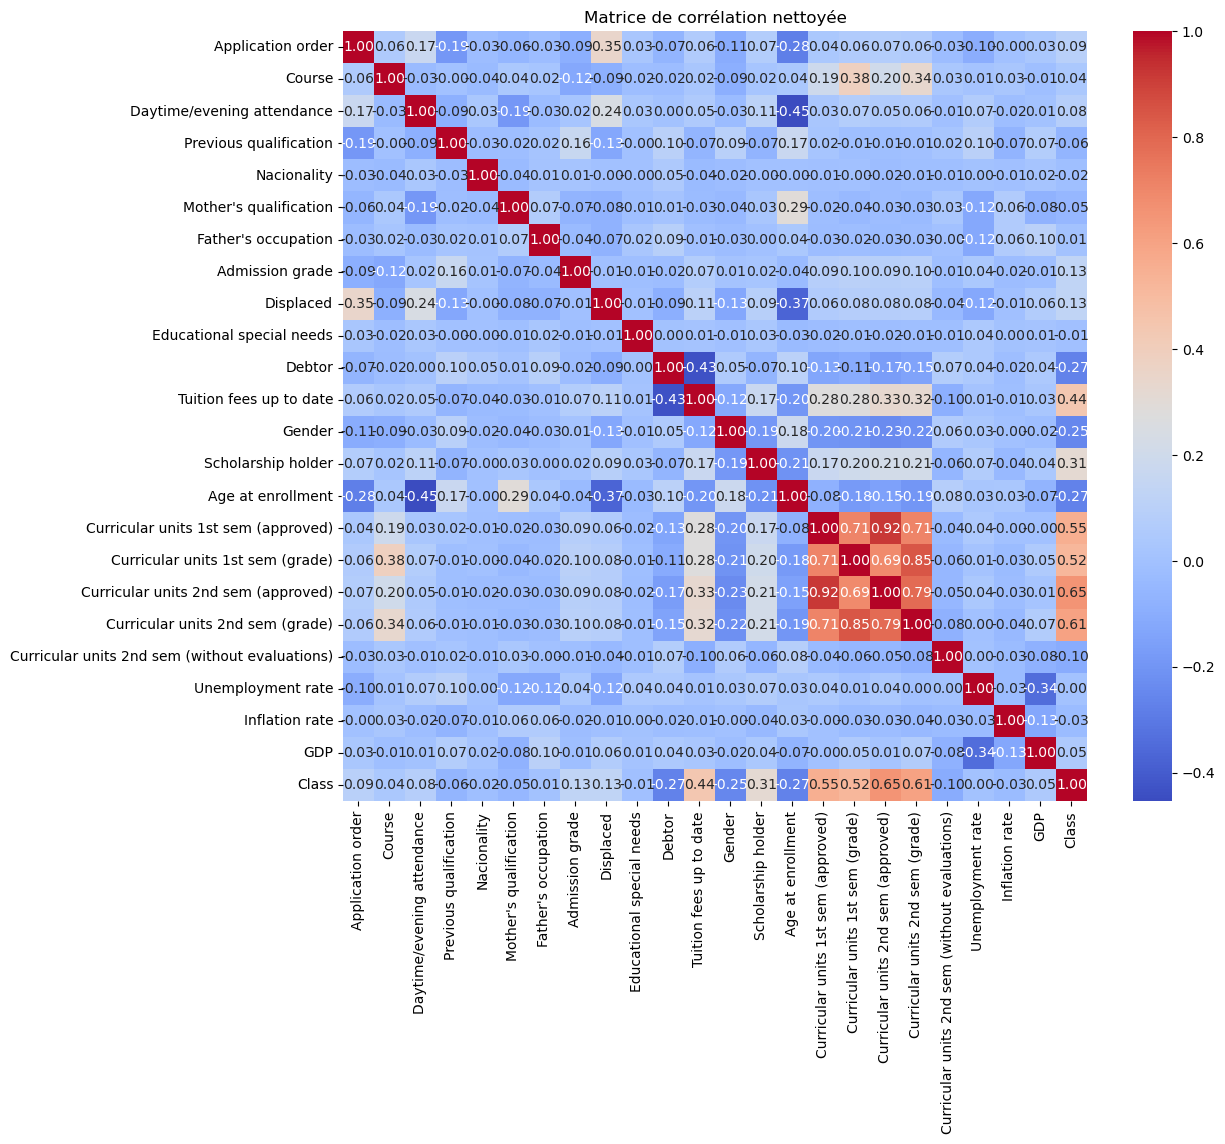

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = df_clean.corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation nettoyée")
plt.show()

# PARTIE 1 : ARBRES


## Modèle 1 : GridSearch : Optimisation des paramètres + Cross Validation. 



<h2 style="color: royalblue;">Dans ce modèle on cherche à optimiser l'arbre avec les hyperparamètres : min_samples_split, max_depth, min_samples_leaf, criterion": ["gini", "entropy"], avec cross validation = 5 (valeur assez commune pour ce genre de problème). Le but étant d'éviter le phénomène de sur-apprentissage sur les données d'entraînement</h2>

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, auc
)
import matplotlib.pyplot as plt


In [54]:
# On sépare en 2 : les variables à prédire et les prédicteurs 
X_clean = df_clean.drop(columns=[target_col])
y_clean = df_clean[target_col]


<h2 style="color: royalblue;">On sépare le dataset en 2 catégories train/test et on normalise les données </h2>

In [47]:
# Train/test split 

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# --- Construire et optimiser un arbre de décision ---
param_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10],
    "max_depth": [3, 4, 5, 7, 9, None],
    "min_samples_leaf": [1, 2, 5, 8, 12]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 5, 8, 12],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [49]:
modèle1 = grid.best_estimator_
print("Meilleurs paramètres :", grid.best_params_)

Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


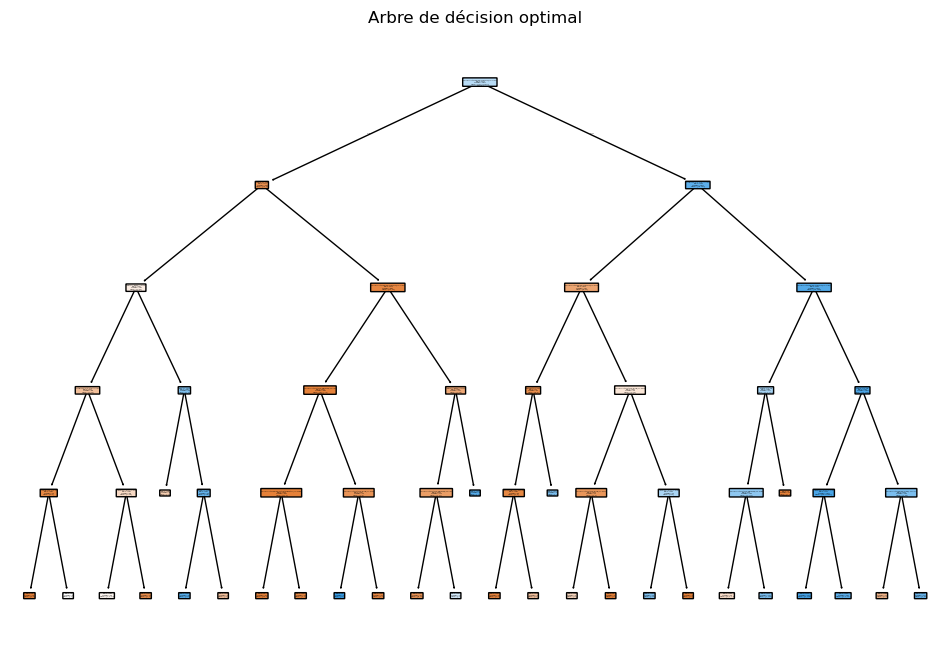

In [50]:
# --- Visualiser l’arbre 1 ---
plt.figure(figsize=(12, 8))
plot_tree(
    modèle1,
    filled=True,
    feature_names=X_clean.columns.tolist(),  # ✅ conversion en liste
    class_names=[str(cls) for cls in y_clean.unique()],  # ✅ pour éviter l’erreur class_names=True
    rounded=True
)
plt.title("Arbre de décision optimal")
plt.show()

In [51]:
# --- Évaluer sur le jeu test ---
y_pred = modèle1.predict(X_test)

print("\n=== Detailed Accuracy By Class ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Detailed Accuracy By Class ===
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       284
           1       0.88      0.95      0.92       442

    accuracy                           0.89       726
   macro avg       0.90      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726


=== Confusion Matrix ===
[[228  56]
 [ 22 420]]


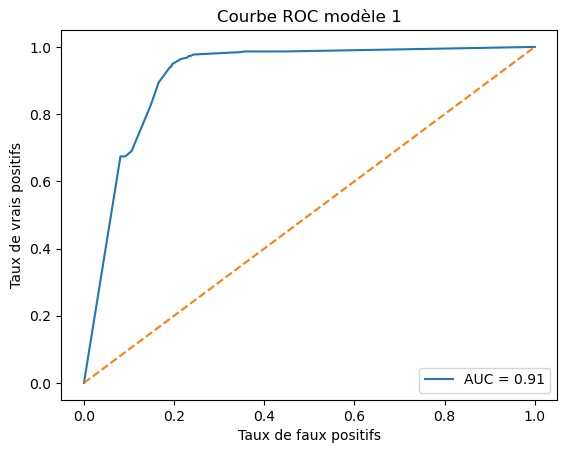

AUC : 0.9145489452552418


In [52]:

# --- Courbe ROC et AUC ---
if len(y_clean.unique()) == 2:
    y_proba = modèle1.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=y_clean.unique()[1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title("Courbe ROC modèle 1")
    plt.xlabel("Taux de faux positifs")
    plt.ylabel("Taux de vrais positifs")
    plt.legend()
    plt.show()
    print("AUC :", roc_auc)

<h2 style="color: royalblue;">On obtient les paramètres : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10} et une précision de 0.89</h2>

## Modèle 2 :  ccp_alpha : élagage automatique



<h2 style="color: royalblue;">Dans ce modèle on cherche à optimiser l'arbre avec le paramètre ccp_alpha qui cherche un compromis entre élagage et précision.  </h2>

🌟 Meilleurs paramètres avant élagage : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


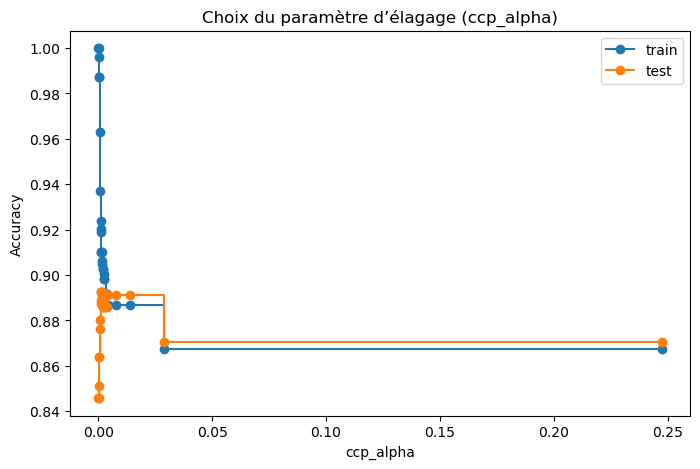

🌿 Meilleur alpha retenu : 0.00090

--- Rapport de classification ---
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       284
           1       0.88      0.96      0.92       442

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.90      0.89      0.89       726


--- Matrice de confusion ---
[[225  59]
 [ 19 423]]

Accuracy globale : 0.8925619834710744


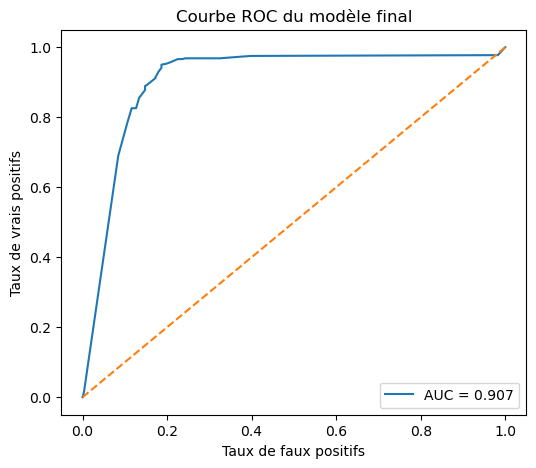

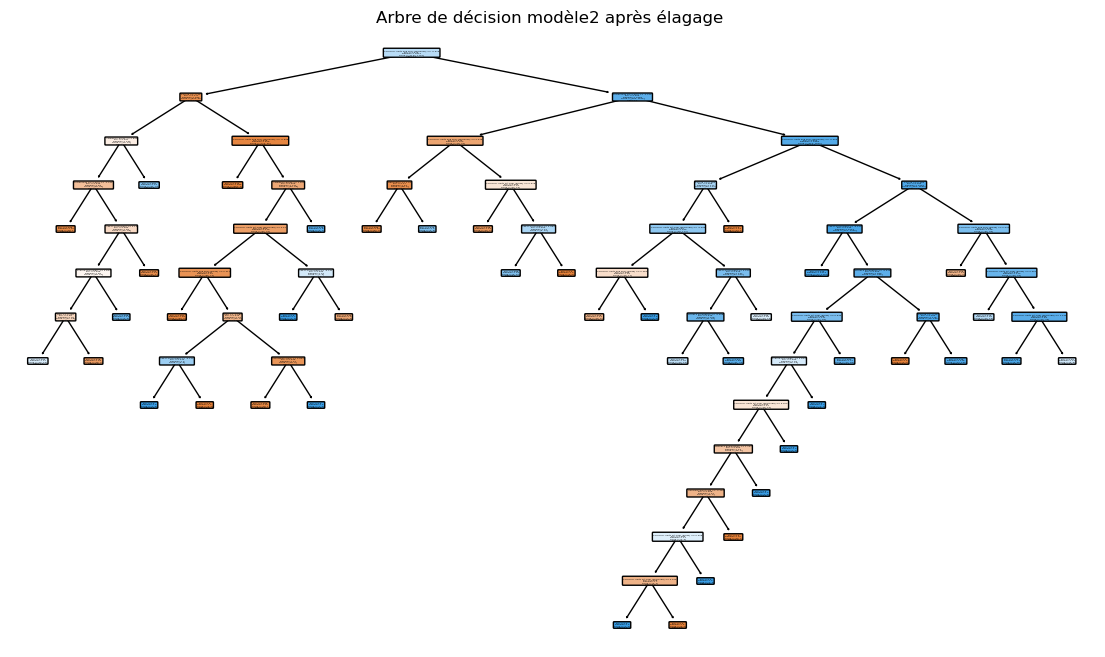

In [ ]:
y=y_clean
X=X_clean
# --- Importation des bibliothèques ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt


# --- Optimisation initiale des hyperparamètres ---
param_grid = {
    
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_leaf": [1, 2, 5]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)
grid.fit(X_train, y_train)

modèle1 = grid.best_estimator_
print("Meilleurs paramètres avant élagage :", grid.best_params_)

# --- Élagage du modèle (post-pruning) ---
# On récupère les valeurs possibles de ccp_alpha
path = modèle1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# On entraîne plusieurs arbres pour trouver le meilleur alpha
models = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    models.append(model)

# Calcul du score de chaque modèle
train_scores = [m.score(X_train, y_train) for m in models]
test_scores = [m.score(X_test, y_test) for m in models]

# Visualisation pour choisir le bon alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Choix du paramètre d’élagage (ccp_alpha)")
plt.legend()
plt.show()

# Sélection du meilleur modèle après élagage
best_alpha = ccp_alphas[np.argmax(test_scores)]
modèle2 = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
modèle2.fit(X_train, y_train)

print(f"Meilleur alpha retenu : {best_alpha:.5f}")

# --- 5. Évaluation du modèle final ---
y_pred = modèle2.predict(X_test)
print("\n--- Rapport de classification ---")
print(classification_report(y_test, y_pred))
print("\n--- Matrice de confusion ---")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy globale :", accuracy_score(y_test, y_pred))


y_proba = modèle2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
auc_score = roc_auc_score(y_test.map(lambda x: 1 if x==1 else 0), y_proba)




# --- 6. Courbe ROC et AUC ---
if len(y.unique()) == 2:  # cas binaire uniquement
    y_proba = modèle2.predict_proba(X_test)[:, 1]
    # solution simple : préciser le label positif
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
    auc_score = roc_auc_score(y_test.map(lambda x: 1 if x==1 else 0), y_proba)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title("Courbe ROC du modèle final")
    plt.xlabel("Taux de faux positifs")
    plt.ylabel("Taux de vrais positifs")
    plt.legend()
    plt.show()

# --- 7. Visualisation de l’arbre élagué ---
plt.figure(figsize=(14, 8))
plot_tree(
    modèle2,
    filled=True,
    feature_names=X.columns.tolist(),
    class_names=[str(c) for c in y.unique()],
    rounded=True
)
plt.title("Arbre de décision modèle2 après élagage ")
plt.show()

In [105]:
print("Profondeur de l'arbre GridSearch :", grid.best_estimator_.get_depth())
print("Profondeur de l'arbre élagué :", modèle2.get_depth())
print("Nombre de feuilles GridSearch :", grid.best_estimator_.get_n_leaves())
print("Nombre de feuilles arbre élagué :", modèle2.get_n_leaves())

Profondeur de l'arbre GridSearch : 5
Profondeur de l'arbre élagué : 13
Nombre de feuilles GridSearch : 28
Nombre de feuilles arbre élagué : 41


<h2 style="color: royalblue;">Avec ce modèle on part d'un arbre non optimisé et on cherche le meilleur alpha. On trouve alpha=0.00090, ce qui est très faible. On peut conclure que élaguer davantage l'arbre n'améliorera pas sa précision avec ce modèle. </h2>

## Modèle 3 : que l'on peut visualiser à partir du modèle 2


<h2 style="color: royalblue;">Ici on part du modèle 2 mais on souhaite visualiser l'arbre si on souhaite par exemple l'utiliser à la main. On force donc max_depth=3 et on visualise l'arbre en question.</h2>

In [106]:
# Exemple : forcer max_depth = 3 pour visualisation
modèle3 = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=best_alpha,
    max_depth=3   # <--- limite la profondeur
)
modèle3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0008972941793797418, max_depth=3,
                       random_state=42)

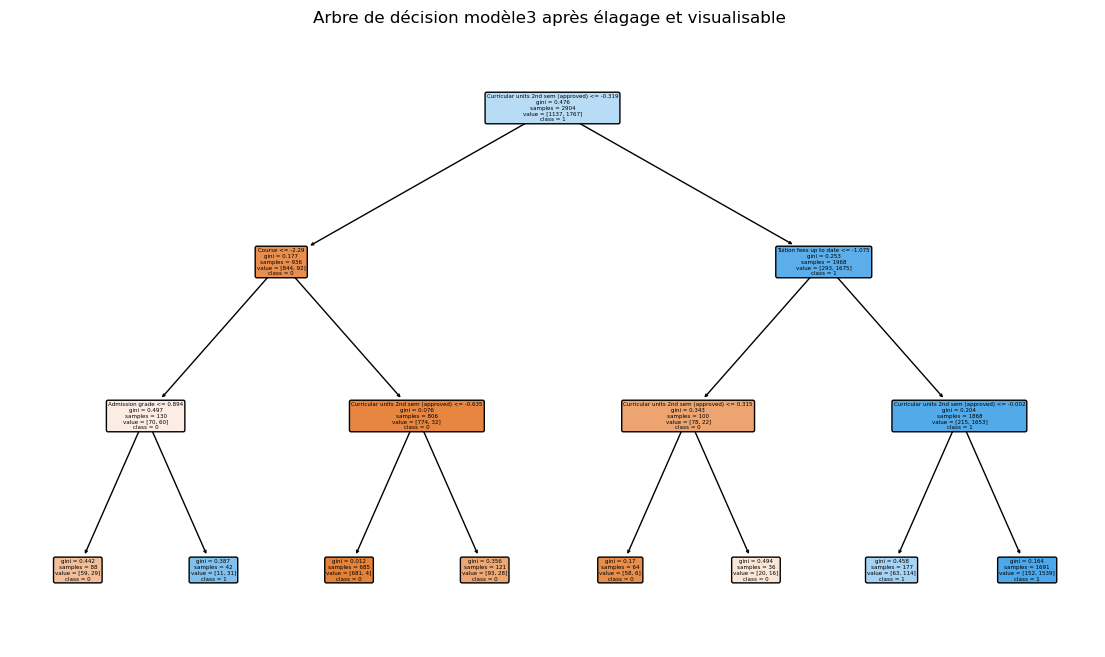

In [107]:
# --- Visualisation de l’arbre élagué ---
plt.figure(figsize=(14, 8))
plot_tree(
    modèle3,
    filled=True,
    feature_names=X.columns.tolist(),
    class_names=[str(c) for c in y.unique()],
    rounded=True
)
plt.title("Arbre de décision modèle3 après élagage et visualisable ")
plt.show()


--- Rapport de classification ---
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       284
           1       0.88      0.96      0.92       442

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.89       726


--- Matrice de confusion ---
[[225  59]
 [ 17 425]]

Accuracy globale : 0.8953168044077136


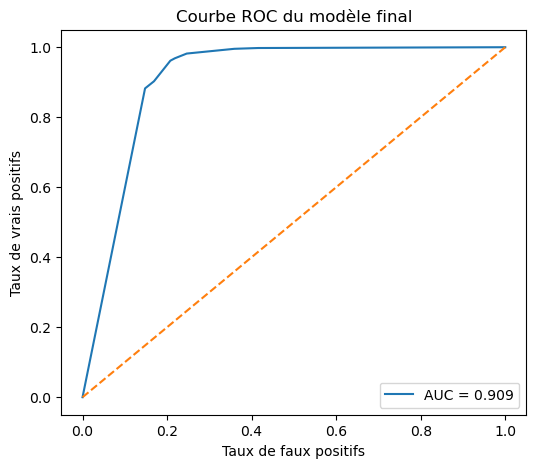

In [108]:
# --- Évaluation du modèle final ---
y_pred = modèle3.predict(X_test)
print("\n--- Rapport de classification ---")
print(classification_report(y_test, y_pred))
print("\n--- Matrice de confusion ---")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy globale :", accuracy_score(y_test, y_pred))





# --- Courbe ROC et AUC ---
if len(y.unique()) == 2:  # cas binaire uniquement
    y_proba = modèle3.predict_proba(X_test)[:, 1]
    # solution simple : préciser le label positif
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
    auc_score = roc_auc_score(y_test.map(lambda x: 1 if x==1 else 0), y_proba)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title("Courbe ROC du modèle final")
    plt.xlabel("Taux de faux positifs")
    plt.ylabel("Taux de vrais positifs")
    plt.legend()
    plt.show()


<h2 style="color: royalblue;">On obtient une précision convaincante de 0.90</h2>

## Modèle Logistique

<h2 style="color: royalblue;">Tentons maintenant de chercher à comparer notre arbre de décision avec un autre classifieur, la régression logistique.</h2>

=== Régression Logistique ===
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       284
           1       0.88      0.95      0.92       442

    accuracy                           0.89       726
   macro avg       0.90      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726

Matrice de confusion :
 [[226  58]
 [ 20 422]]
Accuracy : 0.8925619834710744


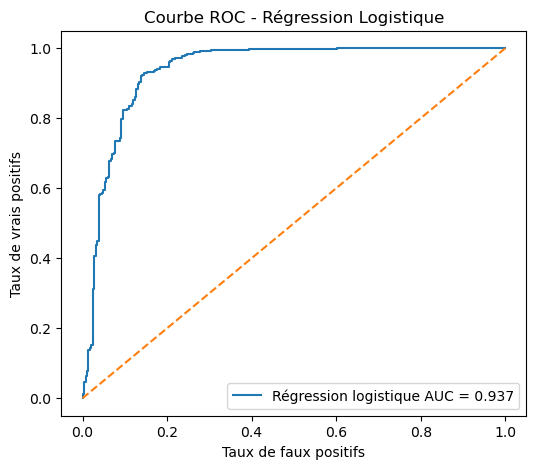

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# --- Préparation des données ---
# Standardisation nécessaire pour la régression logistique
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Modèle de régression logistique ---
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# --- Prédictions ---
y_pred_log = logreg.predict(X_test_scaled)
y_proba_log = logreg.predict_proba(X_test_scaled)[:, 1]

# --- Évaluation ---
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

print("=== Régression Logistique ===")
print(classification_report(y_test, y_pred_log))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_log))
print("Accuracy :", accuracy_score(y_test, y_pred_log))

# Courbe ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log, pos_label=1)
auc_log = roc_auc_score(y_test.map(lambda x: 1 if x==1 else 0), y_proba_log)
plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f"Régression logistique AUC = {auc_log:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.title("Courbe ROC - Régression Logistique")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend()
plt.show()


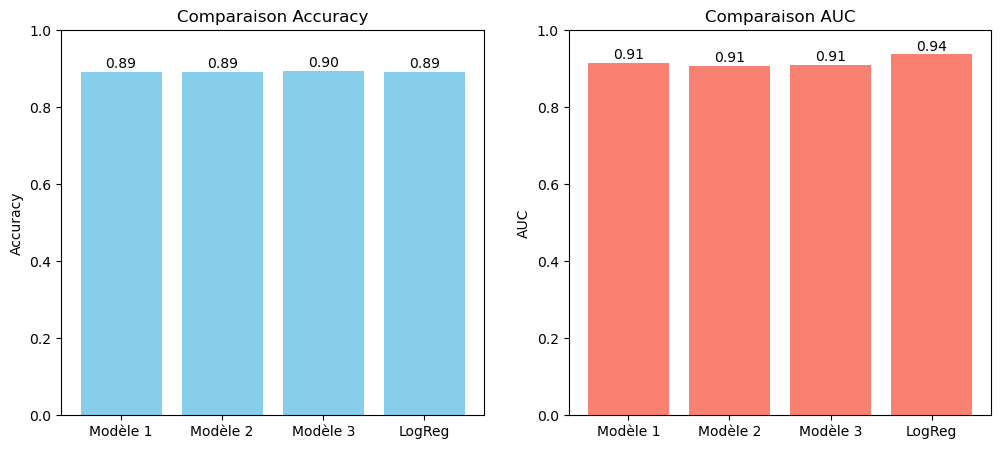

In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

# Dictionnaire de tes modèles
models = {
    "Modèle 1": modèle1,
    "Modèle 2": modèle2,
    "Modèle 3": modèle3,
    "LogReg": logreg
}

# Stockage des scores réels
accuracies = []
auc_scores = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Pour AUC : si le modèle peut donner des probabilités
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc_scores.append(roc_auc_score(y_test, y_proba))
    else:
        auc_scores.append(None)  # si pas de predict_proba

# --- Graphiques ---
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Accuracy
bars1 = ax[0].bar(models.keys(), accuracies, color='skyblue')
ax[0].set_ylim(0, 1)
ax[0].set_title("Comparaison Accuracy")
ax[0].set_ylabel("Accuracy")
for bar, value in zip(bars1, accuracies):
    ax[0].text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01, f"{value:.2f}", ha='center')

# AUC
bars2 = ax[1].bar(models.keys(), auc_scores, color='salmon')
ax[1].set_ylim(0, 1)
ax[1].set_title("Comparaison AUC")
ax[1].set_ylabel("AUC")
for bar, value in zip(bars2, auc_scores):
    if value is not None:
        ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.01, f"{value:.2f}", ha='center')

plt.show()




<h2 style="color: royalblue;">Tentons de comparer les résultats :  </h2> 

<h2 style="color: royalblue;">- Sur l'accuracy les 4 modèles fournissent plus ou moins les mêmes résultats 0.89 /0.90</h2>


<h2 style="color: royalblue;"> 
- En revanche les modèles 1 et 2 sont nettement plus complexes et difficilement visualisables. Ici les modèles complexes sont victimes d'overlifting, ils surapprenent sur les données d'entrainement, les empêchant de généraliser et de comprendre la logique. Les modèles plus simples modèle1 et Regression Logistique généralise assez bien et sont un bon compromis pour la prédiction.
</h2>

<h2 style="color: royalblue;">- Concernant l'AUC, les résultats sont encore très similaires, la régression logistique se détache montrant sa capacité à mieux distinguer les classes</h2>

# PARTIE 2 : FORÊTS

## Modèle 1 : Random Forest 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Nous repartons avec les données de base car on suppose aucun prétraitement dans la forêt aléatoire

#data = pd.read_csv("/Users/pierrelucien/Downloads/8 predict_students_dropout_and_academic_success.csv", header=0, sep=";")
data =pd.read_csv("data.csv",header =0, sep=";")
#Aperçu des données 
data['Class'] = data['Class'].map({'Dropout': 0, 'Graduate': 1})




In [57]:
# Choix de la variable cible 
target_col = 'Class' if 'Class' in data.columns else data.columns[-1]
print("Cible utilisée :", target_col)

Cible utilisée : Class


In [58]:
# On sépare en 2 : les variables à prédire et les prédicteurs 
X = data.drop(columns=[target_col])
y = data[target_col]

In [59]:
# Train/test split pas besoin d'enlever les corrélations, random forest s'en charge déjà


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\victo\anaconda3new\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Meilleurs paramètres RF : {'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 200} avec accuracy = 0.9067
Temps total d'exécution : 225.42 secondes
=== Random Forest ===
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       284
           1       0.88      0.97      0.93       442

    accuracy                           0.90       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.90      0.90       726

Matrice de confusion :
 [[228  56]
 [ 13 429]]


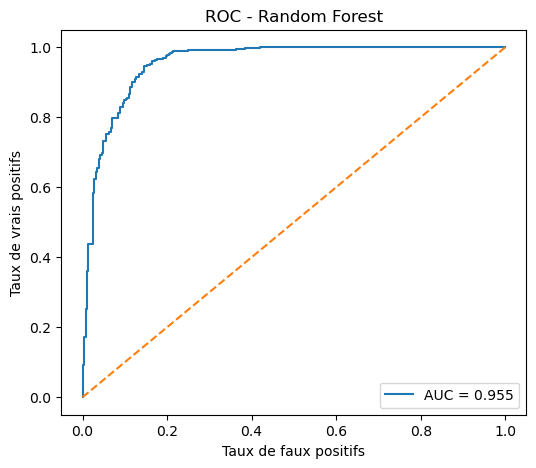

In [60]:
# Pour la forêt aléatoire 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import time

start_time = time.time()

param_grid_rf = {
    'n_estimators': [70, 100, 200],
    'max_depth': [5, 7, 10, 13],
    'min_samples_leaf': [1, 2, 5, 7],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

# --- Résultats ---
print(f"\nMeilleurs paramètres RF : {grid_rf.best_params_} avec accuracy = {grid_rf.best_score_:.4f}")

# Prédictions
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

end_time = time.time()
print(f"Temps total d'exécution : {end_time - start_time:.2f} secondes")

# Rapport de classification
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))

# Courbe ROC (sécurisée)
if len(y_test.unique()) == 2:
    fpr_rf, tpr_rf, _ = roc_curve(y_test.map(lambda x:1 if x==1 else 0), y_proba_rf)
    auc_rf = roc_auc_score(y_test.map(lambda x:1 if x==1 else 0), y_proba_rf)

    plt.figure(figsize=(6,5))
    plt.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_rf:.3f}")
    plt.plot([0,1],[0,1], linestyle="--")
    plt.title("ROC - Random Forest")
    plt.xlabel("Taux de faux positifs")
    plt.ylabel("Taux de vrais positifs")
    plt.legend()
    plt.show()
else:
    print("ROC AUC non calculable : une seule classe présente dans le jeu de test.")


                                   Feature  Importance
30     Curricular units 2nd sem (approved)    0.246553
24     Curricular units 1st sem (approved)    0.149038
31        Curricular units 2nd sem (grade)    0.141039
25        Curricular units 1st sem (grade)    0.079943
16                 Tuition fees up to date    0.068319
29  Curricular units 2nd sem (evaluations)    0.033044
19                       Age at enrollment    0.031136
23  Curricular units 1st sem (evaluations)    0.025519
3                                   Course    0.024621
28     Curricular units 2nd sem (enrolled)    0.019858


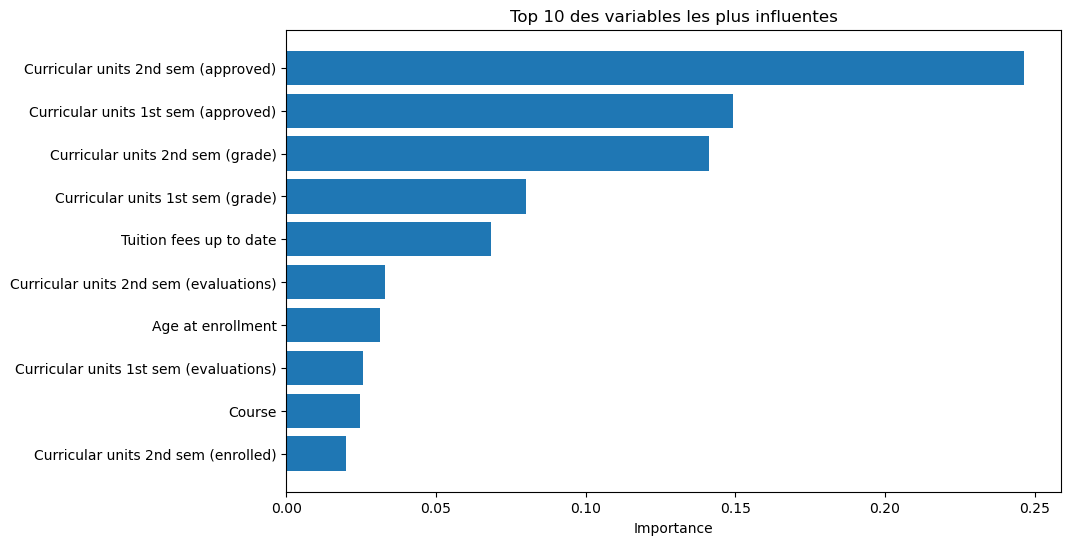

In [61]:
importances = best_rf.feature_importances_  
feature_names = X.columns
df_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})
df_importances = df_importances.sort_values(by="Importance", ascending=False)
print(df_importances.head(10))  # top 10 des features les plus importantes

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(df_importances["Feature"][:10][::-1], df_importances["Importance"][:10][::-1])
plt.xlabel("Importance")
plt.title("Top 10 des variables les plus influentes")
plt.show()


<h2 style="color: royalblue;">La precision du Random Forest est quasiment la même que pour l'arbre simple, en réalité grâce au nettoyage des données dans la partie 1, le modèle random forest n'a pas généralisé davantage. L'AUC a par contre augmenté : Le Random Forest ne fait pas forcément plus meilleurs prédictions binaires,
mais grâce à la moyenne sur plusieurs arbres, les probas sont plus lisses et mieux classées</h2>

<h2 style="color: royalblue;">On note aussi que les facteurs qui déterminent le plus si un élève va échouer/réussir sont : si il réussit son semestre 2, sa note au semestre 2 et si il a réussit son semestre 1. Ce qui semble aussi logique dans la vie quotidienne. </h2>

## Modèle 2 : XG Boost, modèle assez populaire en raison de sa très bonne précision

Meilleurs paramètres XGB : {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       284
           1       0.89      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726

Matrice de confusion :
 [[231  53]
 [ 14 428]]


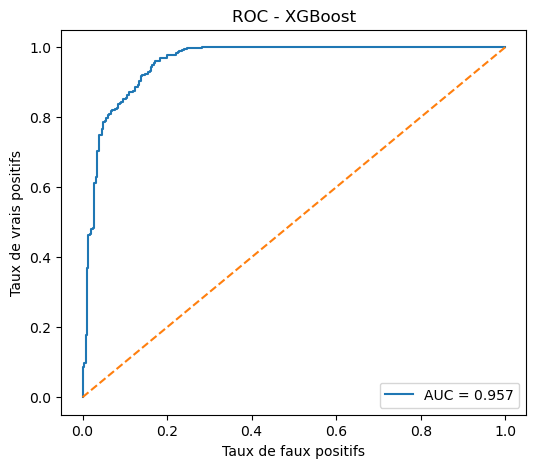

In [63]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



# Paramètres XGBoost
param_grid_xgb = {
    'n_estimators': [70, 100, 500],
    'max_depth': [2, 3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.15],
    'subsample': [0.8, 1]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
print("Meilleurs paramètres XGB :", grid_xgb.best_params_)

# Prédictions
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Rapport de classification
print("\n=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_xgb))

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.title("ROC - XGBoost")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend()
plt.show()


                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.292491
16                         Tuition fees up to date    0.096587
22             Curricular units 1st sem (enrolled)    0.071232
24             Curricular units 1st sem (approved)    0.052884
31                Curricular units 2nd sem (grade)    0.032759
18                              Scholarship holder    0.032693
29          Curricular units 2nd sem (evaluations)    0.028984
26  Curricular units 1st sem (without evaluations)    0.028731
28             Curricular units 2nd sem (enrolled)    0.027595
15                                          Debtor    0.025820


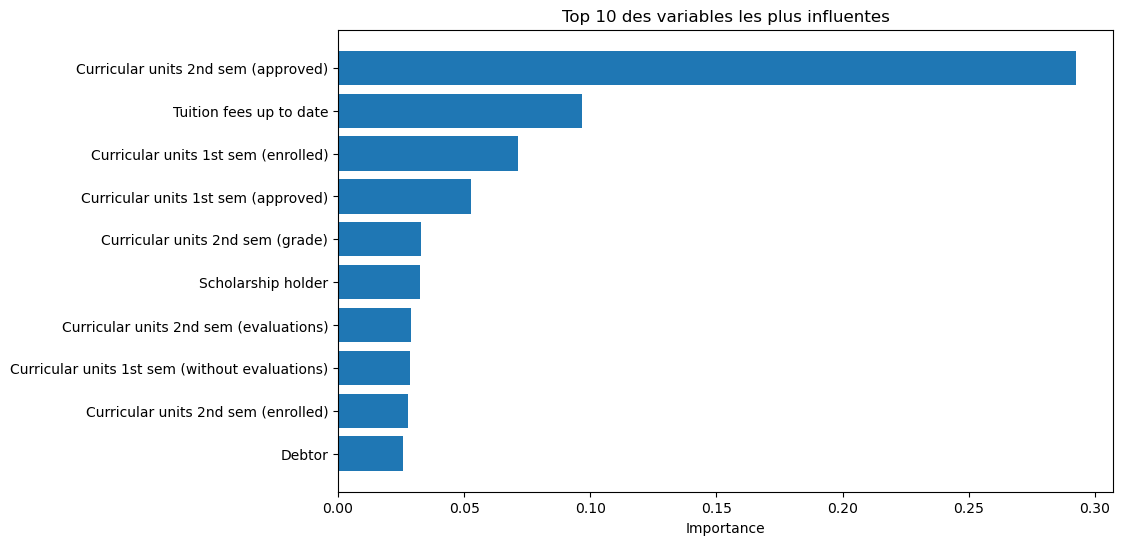

In [64]:
importances = best_xgb.feature_importances_ 
feature_names = X.columns
df_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})
df_importances = df_importances.sort_values(by="Importance", ascending=False)
print(df_importances.head(10))  # top 10 des features les plus importantes

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(df_importances["Feature"][:10][::-1], df_importances["Importance"][:10][::-1])
plt.xlabel("Importance")
plt.title("Top 10 des variables les plus influentes")
plt.show()


<h2 style="color: royalblue;">On obtient la meilleur précision jusqu'à maintenant 91% mais toujours proche de Random Forest, idem pour l'AUC. Toutefois on observe un gros changement au niveau des features importances, cette fois les frais de scolarité ont été décisifs pour prédire si un élève allait échouer ou non. </h2>

## Partie 3 : Forêt d'isolement, détection des anomalies

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#data = pd.read_csv("/Users/pierrelucien/Downloads/KPIs for telecommunication.csv", header=0, sep=";")
data = pd.read_csv("KPIs for telecommunication.csv", header =0, sep=";")

print(" Aperçu des données :")
print(data.head(), "\n")

 Aperçu des données :
    KPI1  KPI2      KPI3   KPI4     KPI5  KPI6    KPI7  KPI8   KPI9     KPI10
0  100.0  0.51    255826  100.0   464882   0.0     760   0.0  100.0    752896
1  100.0  2.01  44096226  100.0  3529790   0.0   12920   0.0  100.0  60808621
2  100.0  5.01   6993836  100.0   572966   0.0  151840   0.0  100.0   7782017
3  100.0  0.51      7838  100.0     4055   0.0       0   0.0  100.0     23733
4  100.0  0.99  14418925  100.0  1345729   0.0    4760   0.0  100.0  15524056 



In [104]:
# 🔹 Typologie des variables
print("Types de variables :")
print(data.dtypes, "\n")

Types de variables :
KPI1     float64
KPI2     float64
KPI3       int64
KPI4     float64
KPI5       int64
KPI6     float64
KPI7       int64
KPI8     float64
KPI9     float64
KPI10      int64
dtype: object 



In [105]:
# 🔹 Valeurs manquantes
print("Valeurs manquantes par variable :")
print(data.isnull().sum(), "\n")

Valeurs manquantes par variable :
KPI1       0
KPI2       0
KPI3       0
KPI4     501
KPI5       0
KPI6     282
KPI7       0
KPI8       0
KPI9     382
KPI10      0
dtype: int64 



<h2 style="color: royalblue;">On observe beaucoup de valeurs manquantes. Pour régler le problème, nous allons les remplacer par la valeur moyenne de la colonne concernée. On se rend de même compte que ce manque de valeur est de l'ordre de jusqu'à 40% environ du nombres totales pour le KPI4 (501/1300) ce qui peux potentiellement posée des questions sur la qualité de nos données et donc de l'étude qui suit.</h2>

=== Statistiques descriptives ===
            Moyenne      Variance    Écart-type
KPI1   7.591400e+01  1.793343e+03  4.234800e+01
KPI2   1.496700e+01  1.108508e+03  3.329400e+01
KPI3   3.427450e+07  9.705612e+15  9.851706e+07
KPI4   9.996500e+01  4.950000e-01  7.030000e-01
KPI5   7.614980e+06  3.622315e+14  1.903238e+07
KPI6   4.350000e-01  8.391000e+00  2.897000e+00
KPI7   3.715659e+04  7.798518e+09  8.830922e+04
KPI8   3.800000e-02  4.760000e-01  6.900000e-01
KPI9   9.993200e+01  5.520000e-01  7.430000e-01
KPI10  4.219081e+07  1.246970e+16  1.116678e+08


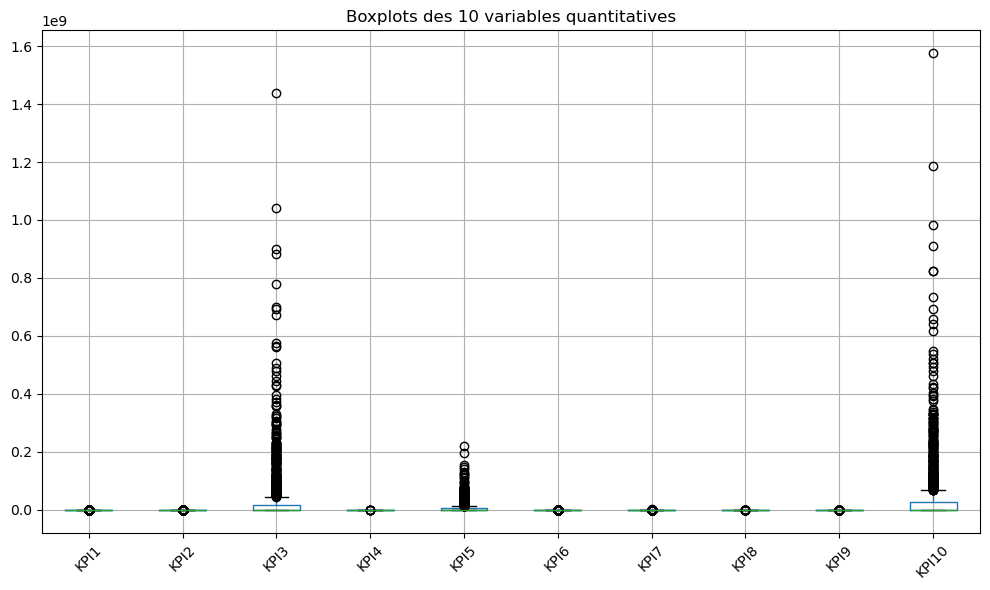

In [93]:
quant_vars = data.select_dtypes(include=['float64', 'int64']).iloc[:, :10]
stats = pd.DataFrame({
    'Moyenne': quant_vars.mean(),
    'Variance': quant_vars.var(),
    'Écart-type': quant_vars.std()
})

data = data.fillna(data.mean())

print("=== Statistiques descriptives ===")
print(stats.round(3))

# --- Boxplots pour visualiser la dispersion (p-box) ---
plt.figure(figsize=(10, 6))
quant_vars.boxplot()

plt.title("Boxplots des 10 variables quantitatives")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)

In [95]:
from sklearn.ensemble import IsolationForest

# --- Construction du modèle Isolation Forest ---
iso = IsolationForest(
    n_estimators=200,     # nombre d’arbres
    contamination='auto', # détection automatique du taux d’anomalies
    random_state=42
)
iso.fit(train_df)


IsolationForest(n_estimators=200, random_state=42)

In [96]:
# --- Calcul du score d’anomalie sur le test ---
scores = -iso.decision_function(test_df)  # plus le score est élevé → plus c’est anormal
test_df = test_df.copy()
test_df["anomaly_score"] = scores

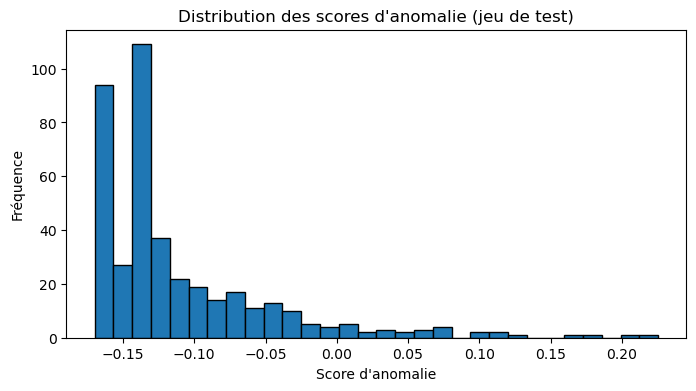

In [97]:
# --- Analyse graphique des scores ---
plt.figure(figsize=(8,4))
plt.hist(scores, bins=30, edgecolor='k')
plt.title("Distribution des scores d'anomalie (jeu de test)")
plt.xlabel("Score d'anomalie")
plt.ylabel("Fréquence")
plt.show()

<h2 style="color: royalblue;">Les scores sont bien concentré sur des données qualifiés de "normal", on voit quand même bien une grosse distribution dans la partie négative des scores.</h2>

In [98]:
# --- Afficher les observations les plus anormales ---
print("\n=== Observations les plus anormales ===")
print(test_df.sort_values("anomaly_score", ascending=False).head())


=== Observations les plus anormales ===
        KPI1    KPI2        KPI3    KPI4       KPI5   KPI6    KPI7   KPI8  \
919  100.000  336.00  1042654150  100.00  155110588  0.139  595680  0.000   
704   99.602  204.00   700464532  100.00  141627720  0.000  502880  0.000   
923  100.000   58.02   477905432   98.78   33323670  0.208  242400  0.216   
706   99.826  109.02  1436894488  100.00  129597500  0.000  275840  0.000   
679   99.773   41.49   900583010  100.00   60397305  0.000  141160  0.000   

        KPI9       KPI10  anomaly_score  
919  100.000  1186998602       0.225562  
704  100.000   822157450       0.201892  
923  100.000   506434120       0.177984  
706  100.000  1575626402       0.160308  
679  100.251   982963150       0.120166  


<h2 style="color: royalblue;">Nous cherchons maintenant à améliorer notre algorithme de la forêt d'isolement afin d'obtenir des résultats plus intérprétables. Nous avons deux principaux axes qui sont la comparaison entre les score et les KPIs par ANOVA (analyse de variance) et aussi l'utilisation d'hyperparamètre pour optimiser le nombre d'arbres utiliser dans la forêt. Le but étant de mieux isoler nos valeurs anormales (leur affecter un score plus grand encore)</h2>

=== Résultats de l’ANOVA (par variable) ===
             p-value
KPI4    0.000000e+00
KPI9    0.000000e+00
KPI1   8.634428e-179
KPI2    1.685474e-19
KPI7    5.496922e-18
KPI5    4.480206e-14
KPI10   1.368173e-10
KPI3    1.711616e-09
KPI6    2.740448e-06
KPI8    1.581908e-05


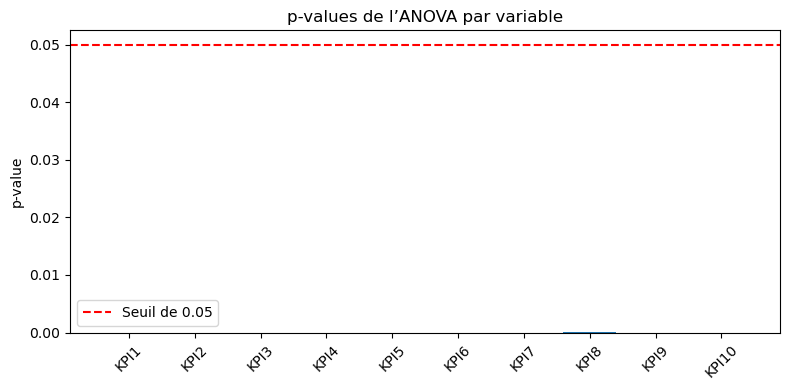

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from scipy.stats import f_oneway
import matplotlib.pyplot as plt


# --- Sélection des 10 variables quantitatives ---
X = data.select_dtypes(include=['float64', 'int64']).iloc[:, :10]

# --- Division apprentissage / test ---
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# --- Isolation Forest ---
iso = IsolationForest(n_estimators=200, contamination='auto', random_state=42)
iso.fit(X_train)
scores = -iso.decision_function(X_test)  # score d’anomalie (plus grand = plus suspect)

# --- ANOVA entre variables : chaque variable vs score d’anomalie ---
anova_results = {}
for col in X_test.columns:
    stat, p = f_oneway(X_test[col], scores)
    anova_results[col] = p

anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p-value'])
print("=== Résultats de l’ANOVA (par variable) ===")
print(anova_df.sort_values('p-value'))

# --- Visualisation ---
plt.figure(figsize=(8,4))
plt.bar(anova_df.index, anova_df['p-value'])
plt.axhline(0.05, color='r', linestyle='--', label='Seuil de 0.05')
plt.title("p-values de l’ANOVA par variable")
plt.ylabel("p-value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<h2 style="color: royalblue;">La p-value indique la probabilité que la variable n’ait aucun effet sur le score d’anomalie. Plus la p-value est petite, plus la variable est fortement associée aux anomalies. Ici, toutes les p-values sont extrêmement petites, ce qui suggère que toutes tes KPI sont significativement liées aux scores d’anomalie.</h2>

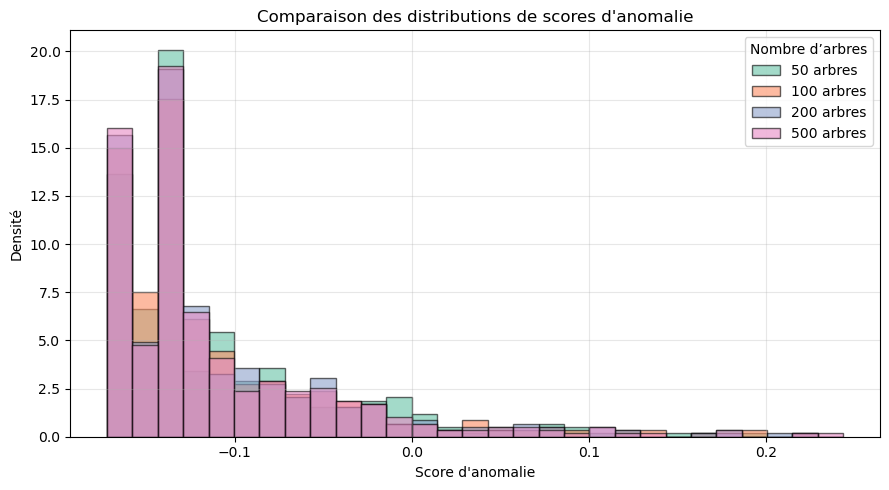

Statistique F = 0.325, p-value = 0.80740
➡️ Pas de différence significative entre les modèles.

Modèle optimal : 500 arbres (variance maximale des scores = 0.00442)


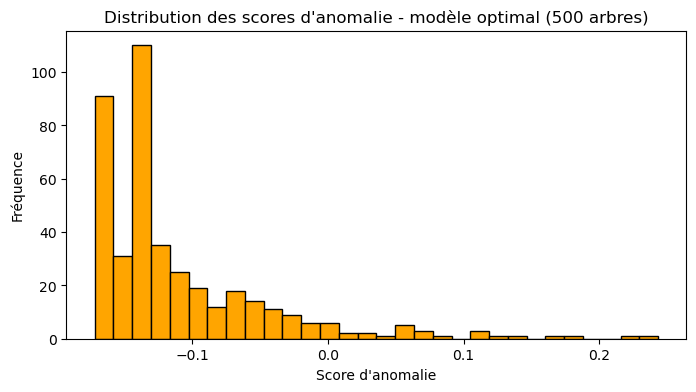

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from scipy.stats import f_oneway


# Sélection des 10 variables quantitatives
X = data.select_dtypes(include=['float64', 'int64']).iloc[:, :10]

# Division apprentissage / test (70% / 30%)
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# --- 2. Test de plusieurs modèles pour optimiser la performance ---
params = [50, 100, 200, 500]
results = {}

for n in params:
    iso = IsolationForest(n_estimators=n, contamination='auto', random_state=42)
    iso.fit(X_train)
    scores = -iso.decision_function(X_test)
    results[n] = scores

# --- 3. Analyse graphique (corrigée et esthétique) ---
plt.figure(figsize=(9,5))
colors = sns.color_palette("Set2", len(params))
bins = np.linspace(min(min(v) for v in results.values()),
                   max(max(v) for v in results.values()), 30)

for n, color in zip(params, colors):
    plt.hist(results[n],
             bins=bins,
             alpha=0.6,
             edgecolor='black',
             color=color,
             label=f"{n} arbres",
             density=True)

plt.title("Comparaison des distributions de scores d'anomalie")
plt.xlabel("Score d'anomalie")
plt.ylabel("Densité")
plt.legend(title="Nombre d’arbres")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 4. Analyse de la variance (ANOVA) ---
anova_scores = list(results.values())
stat, p = f_oneway(*anova_scores)
print(f"Statistique F = {stat:.3f}, p-value = {p:.5f}")

if p < 0.05:
    print("➡️ Il existe une différence significative entre les modèles : certains sont plus performants.")
else:
    print("➡️ Pas de différence significative entre les modèles.")

# --- 5. Sélection du meilleur modèle ---
# Exemple : on choisit celui dont la variance des scores est la plus grande (meilleure séparation)
best_n = max(params, key=lambda n: results[n].var())
print(f"\nModèle optimal : {best_n} arbres (variance maximale des scores = {results[best_n].var():.5f})")

# --- 6. Visualisation finale du modèle optimal ---
best_scores = results[best_n]
plt.figure(figsize=(8,4))
plt.hist(best_scores, bins=30, color='orange', edgecolor='k')
plt.title(f"Distribution des scores d'anomalie - modèle optimal ({best_n} arbres)")
plt.xlabel("Score d'anomalie")
plt.ylabel("Fréquence")
plt.show()


<h2 style="color: royalblue;">F ≈ 0.325 : la variance entre les groupes (ou ici entre les modèles testés) est très faible comparée à la variance intra-groupe.p-value ≈ 0.807 : très grande (> 0.05), donc on ne rejette pas l’hypothèse nulle. Tous les modèles se comportent de manière similaire pour cette métrique.</h2>

In [107]:
# --- 7. Affichage des 5 plus normales et 5 plus anormales ---
X_test_copy = X_test.copy()
X_test_copy["anomaly_score"] = best_scores

print("\n===  5 observations les plus NORMALES ===")
print(X_test_copy.sort_values("anomaly_score", ascending=True).head(5))

print("\n===  5 observations les plus ANORMALES ===")
print(X_test_copy.sort_values("anomaly_score", ascending=False).head(5))




===  5 observations les plus NORMALES ===
       KPI1  KPI2   KPI3   KPI4   KPI5  KPI6  KPI7  KPI8   KPI9   KPI10  \
503   100.0  1.50  98652  100.0  59511   0.0     0   0.0  100.0  144948   
479   100.0  1.50  85894  100.0  64280   0.0     0   0.0  100.0  135806   
915   100.0  0.00  25208  100.0  34831   0.0     0   0.0  100.0   46388   
1357  100.0  0.51  16216  100.0   5350   0.0     0   0.0  100.0   20655   
76    100.0  0.99  80845  100.0  66756   0.0   240   0.0  100.0  167257   

      anomaly_score  
503       -0.172002  
479       -0.172002  
915       -0.171848  
1357      -0.171846  
76        -0.171799  

===  5 observations les plus ANORMALES ===
        KPI1    KPI2        KPI3    KPI4       KPI5   KPI6    KPI7   KPI8  \
919  100.000  336.00  1042654150  100.00  155110588  0.139  595680  0.000   
704   99.602  204.00   700464532  100.00  141627720  0.000  502880  0.000   
706   99.826  109.02  1436894488  100.00  129597500  0.000  275840  0.000   
923  100.000   58.02  

<h2 style="color: royalblue;">Nous avons maintenant les tops 5 scores d'anomalies les plus bas (normales) et plus haut (anormales).
On se rend tout de suite compte que les résultats d'anomalie sont plus grands pour ce modèle, ce qui confirme la bonne utilisation de l'analyse de variance et l'hyperparamétrisation de la forêt.
Cherchons à reconvertir ces scores pour pouvoir intérpréter les chemins moyens parcouru par nos données dans la forêt.</h2>

In [110]:
def score_samples_to_path_length(score_samples, n_samples):
    """
    Convertit les score_samples de scikit-learn en longueurs moyennes de chemin (E[h(x)]).
    """
    c_n = 2 * (np.log(n_samples - 1) + 0.5772156649) - 2 * (n_samples - 1) / n_samples
    return -score_samples * c_n

E_h = score_samples_to_path_length(iso.score_samples(X_test), n_samples=iso.max_samples_)

# --- 5 points les plus normaux (chemins les plus longs) ---
idx_top5_normal = np.argsort(E_h)[-5:][::-1]  # indices triés décroissant
print("Top 5 points les plus normaux (chemins les plus longs) :")
for i in idx_top5_normal:
    print(f"Point {i} → longueur de chemin = {E_h[i]:.3f}")

# --- 5 points les plus anormaux (chemins les plus courts) ---
idx_top5_anomalous = np.argsort(E_h)[:5]  # indices triés croissant
print("\nTop 5 points les plus anormaux (chemins les plus courts) :")
for i in idx_top5_anomalous:
    print(f"Point {i} → longueur de chemin = {E_h[i]:.3f}")


Top 5 points les plus normaux (chemins les plus longs) :
Point 270 → longueur de chemin = 7.616
Point 95 → longueur de chemin = 7.415
Point 402 → longueur de chemin = 7.021
Point 355 → longueur de chemin = 6.904
Point 144 → longueur de chemin = 6.562

Top 5 points les plus anormaux (chemins les plus courts) :
Point 202 → longueur de chemin = 3.360
Point 152 → longueur de chemin = 3.360
Point 200 → longueur de chemin = 3.362
Point 409 → longueur de chemin = 3.362
Point 63 → longueur de chemin = 3.362


<h2 style="color: royalblue;">Conclusion : Nous avons bien l'observation d'isolement des anomalies qui corresponds à des chemins court de par leurs grands écarts par rapport aux autres variables. Nous retrouvons à l'inverse des chemins plus longs pour nos variables "normal"</h2>